# Imports

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
#Imports de base
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
#Import du fichier à analyser
PA75016_df = pd.read_csv("/Users/Edouard_1/code/TheLab75/ParisDeepAirProject/data/pollution/2_Processed/PA75016.csv").copy()
PA75016_df = PA75016_df[:-25]
PA75016_df






,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42546,2022/11/13 19:00:00+00,18.5,18.2,35.4,NaN,NaN,75016 - Porte Auteuil,Traffic
42547,2022/11/13 20:00:00+00,18.8,21.8,29.6,NaN,NaN,75016 - Porte Auteuil,Traffic
42548,2022/11/13 21:00:00+00,19.4,29.9,32.1,NaN,NaN,75016 - Porte Auteuil,Traffic
42549,2022/11/13 22:00:00+00,22.8,23.2,29.4,NaN,NaN,75016 - Porte Auteuil,Traffic


# EDA

In [4]:
from workflow.utils import analyse_df


In [5]:
#Analyse du fichier PA75016
analyse_df(PA75016_df)

General Info:
42551 Rows 8 Columns
0 Duplicated Rows
Memory Usage: 2.60Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Date_time', 'Station_name', 'Station_type']


,PM25,PM10,NO2,O3,SO2
count,41229.000000,41405.000000,40738.000000,0.0,25444.000000
mean,15.098152,33.391631,73.241266,NaN,1.309079
std,8.906364,17.560687,29.101300,NaN,1.363716
min,0.000000,0.400000,5.100000,NaN,0.000000
25%,9.200000,21.100000,53.500000,NaN,0.200000
50%,13.000000,29.900000,71.100000,NaN,1.000000
75%,18.400000,41.800000,90.300000,NaN,2.000000
max,193.000000,253.000000,286.000000,NaN,75.900000



Cheking Missing Values:
Column "PM25" has 1322 missing values (3.11%)
Column "PM10" has 1146 missing values (2.69%)
Column "NO2" has 1813 missing values (4.26%)
Column "O3" has 42551 missing values (100.00%)
Column "SO2" has 17107 missing values (40.20%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.78


/Users/Edouard_1/code/TheLab75/ParisDeepAirProject/workflow/utils.py:84: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


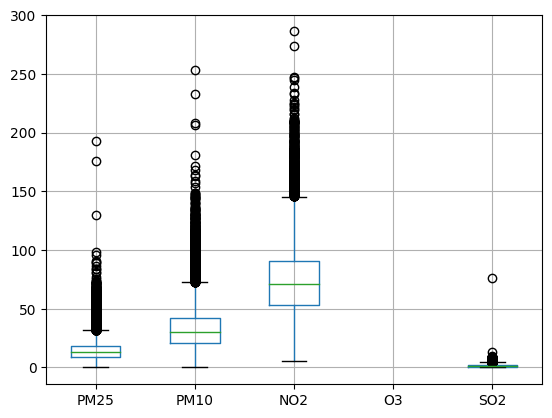

In [6]:
PA75016_df.boxplot();

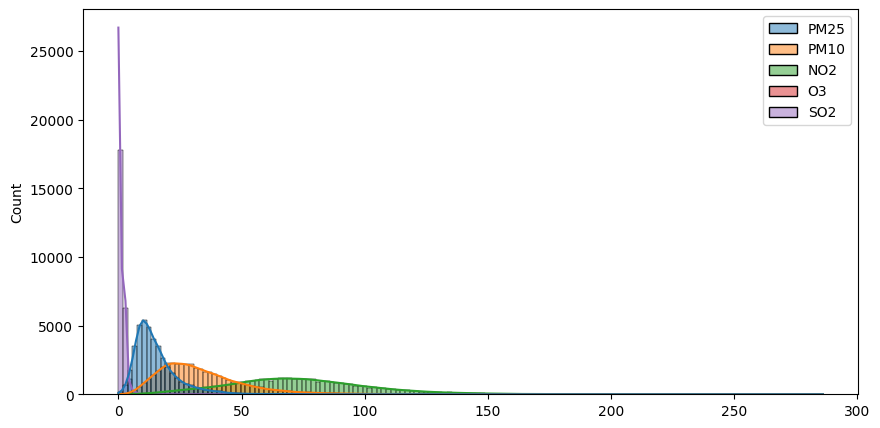

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data=PA75016_df,kde=True,bins=150)
plt.show()

## Conlusion de l'EDA

Synthèse de l'EDA sur la station PA75016:
- De 2018 à 2022, la part de NaN est faible pour les polluants suivants : PM25, PM10 & NO2 (<6% de NaN) --> **À garder.**
- Concernnant le SO2, la part de NaN est faible, progresse à partir de 2020, pour exploser en 2021, et atteindre 100% en 2022. -->  **À dropper.**
- Concernant l'O3, le nombre de NaN est à 100% de 2018 à 2022 --> **À dropper.**

# Preprocessing

In [8]:
## Drop des colonnes avec beaucoup de Nan
PA75016_df = PA75016_df.drop(columns=['O3', 'SO2', 'Station_name', 'Station_type'])
PA75016_df


,Date_time,PM25,PM10,NO2
0,2018/01/01 01:00:00+00,NaN,NaN,NaN
1,2018/01/01 02:00:00+00,NaN,NaN,NaN
2,2018/01/01 03:00:00+00,NaN,NaN,NaN
3,2018/01/01 04:00:00+00,NaN,NaN,NaN
4,2018/01/01 05:00:00+00,NaN,NaN,NaN
...,...,...,...,...
42546,2022/11/13 19:00:00+00,18.5,18.2,35.4
42547,2022/11/13 20:00:00+00,18.8,21.8,29.6
42548,2022/11/13 21:00:00+00,19.4,29.9,32.1
42549,2022/11/13 22:00:00+00,22.8,23.2,29.4


## X & y - SimpleImputer

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

num_features_normal = ['NO2']
num_features_skewed = ['PM25','PM10']

num_imputer_normal = make_pipeline(
    SimpleImputer(strategy='median'))

num_imputer_skewed = make_pipeline(
    SimpleImputer(strategy='median'))

preprocessor_imputer = make_column_transformer(
    (num_imputer_normal, num_features_normal),
    (num_imputer_skewed, num_features_skewed))

preprocessor_imputer


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['NO2']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['PM25', 'PM10'])])

In [10]:
PA75016_preprocessed = pd.DataFrame(preprocessor_imputer.fit_transform(PA75016_df))


In [11]:
PA75016_preprocessed = PA75016_preprocessed.rename(columns={0:"PM25",1:"PM10",2:"NO2"})
PA75016_preprocessed = PA75016_preprocessed.set_index(PA75016_df['Date_time'])


In [12]:
PA75016_preprocessed


,PM25,PM10,NO2
Date_time,,,
2018/01/01 01:00:00+00,71.1,13.0,29.9
2018/01/01 02:00:00+00,71.1,13.0,29.9
2018/01/01 03:00:00+00,71.1,13.0,29.9
2018/01/01 04:00:00+00,71.1,13.0,29.9
2018/01/01 05:00:00+00,71.1,13.0,29.9
...,...,...,...
2022/11/13 19:00:00+00,35.4,18.5,18.2
2022/11/13 20:00:00+00,29.6,18.8,21.8
2022/11/13 21:00:00+00,32.1,19.4,29.9


In [13]:
PA75016_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42551 entries, 2018/01/01 01:00:00+00 to 2022/11/13 23:00:00+00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    42551 non-null  float64
 1   PM10    42551 non-null  float64
 2   NO2     42551 non-null  float64
dtypes: float64(3)
memory usage: 1.3+ MB


## X & y - Passer Date_time d'un step horaire à un step journalier

In [14]:
from workflow.daily_basis import mean_max_categorical

PA75016_daily = mean_max_categorical(PA75016_preprocessed)


In [15]:
PA75016_daily



,Date_time,PM25,PM10,NO2
0,2018/01/01,71.10,13.00,29.9
1,2018/01/02,71.10,13.00,29.9
2,2018/01/03,71.10,13.00,29.9
3,2018/01/04,71.10,13.00,29.9
4,2018/01/05,71.10,12.83,36.2
...,...,...,...,...
1770,2022/11/09,57.41,9.46,36.0
1771,2022/11/10,55.69,13.10,42.8
1772,2022/11/11,35.26,10.79,25.7
1773,2022/11/12,49.01,23.87,82.2


## Obtenir y

In [16]:
from workflow.calcul_ATMO import general_categorical

PA75016_daily_cat = PA75016_daily.copy()
PA75016_daily_cat = general_categorical(PA75016_daily_cat)
PA75016_daily_cat
from workflow.calcul_ATMO import calcul_ATMO

PA75016_daily_cat = calcul_ATMO(PA75016_daily_cat)
PA75016_daily_cat




,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO
0,2018/01/01,71.10,13.00,29.9,4,0,0,4
1,2018/01/02,71.10,13.00,29.9,4,0,0,4
2,2018/01/03,71.10,13.00,29.9,4,0,0,4
3,2018/01/04,71.10,13.00,29.9,4,0,0,4
4,2018/01/05,71.10,12.83,36.2,4,0,0,4
...,...,...,...,...,...,...,...,...
1770,2022/11/09,57.41,9.46,36.0,4,0,0,4
1771,2022/11/10,55.69,13.10,42.8,4,0,1,4
1772,2022/11/11,35.26,10.79,25.7,3,0,0,3
1773,2022/11/12,49.01,23.87,82.2,3,1,1,3


In [17]:


PA75016_daily_cat["Date_time"]= pd.to_datetime(PA75016_daily_cat["Date_time"])
PA75016_daily_cat.dtypes
PA75016_daily_cat
PA75016_daily_cat["year"] = PA75016_daily_cat["Date_time"].dt.year
PA75016_daily_cat["week"] = PA75016_daily_cat["Date_time"].dt.week
PA75016_daily_cat["day"] = PA75016_daily_cat["Date_time"].dt.day
PA75016_daily_cat["month"] = PA75016_daily_cat["Date_time"].dt.month
PA75016_daily_cat["weekday_name"] = PA75016_daily_cat["Date_time"].dt.day_of_week


PA75016_daily_cat["weekday_name"].unique()



#Ici on veut grouper les colonnes de 2018 par semaine et extraire la med

df_all_year = PA75016_daily_cat.groupby(by=["year","week"],as_index=False).mean()









#df_all_year





/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_61686/3139527643.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  PA75016_daily_cat["week"] = PA75016_daily_cat["Date_time"].dt.week
/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_61686/3139527643.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_all_year = PA75016_daily_cat.groupby(by=["year","week"],as_index=False).mean()


In [18]:
df_all_month = PA75016_daily_cat.groupby(by=["year","month"],as_index=False).mean()

df_all_month
    
    
    

/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_61686/1512528829.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_all_month = PA75016_daily_cat.groupby(by=["year","month"],as_index=False).mean()


,year,month,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,weekday_name
0,2018,1,76.916774,15.090968,45.022581,4.580645,0.225806,0.516129,4.580645,2.741935,16.000000,2.806452
1,2018,2,93.398929,23.745357,78.278571,4.857143,0.678571,1.321429,4.857143,6.928571,14.500000,3.000000
2,2018,3,93.063548,18.120323,68.622581,4.935484,0.322581,1.129032,4.935484,11.129032,16.000000,3.096774
3,2018,4,89.835667,15.195333,70.423333,4.866667,0.200000,1.233333,4.866667,15.500000,15.500000,3.000000
4,2018,5,88.965484,18.448065,70.487097,4.774194,0.354839,1.193548,4.774194,19.870968,16.000000,2.903226
5,2018,6,89.659333,17.202667,61.230000,4.866667,0.200000,1.033333,4.866667,24.200000,15.500000,3.100000
6,2018,7,103.715806,16.052903,74.529032,4.774194,0.258065,1.258065,4.774194,28.580645,16.000000,2.935484
7,2018,8,79.479677,12.781290,67.070968,4.387097,0.064516,1.129032,4.387097,33.000000,16.000000,3.000000
8,2018,9,91.754667,15.897000,73.986667,4.800000,0.200000,1.166667,4.800000,37.333333,15.500000,3.166667
9,2018,10,83.502258,18.715484,66.770968,4.612903,0.387097,1.000000,4.612903,41.741935,16.000000,2.806452


In [19]:
df_all_month[df_all_month["month"] == 1]


,year,month,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,weekday_name
0,2018,1,76.916774,15.090968,45.022581,4.580645,0.225806,0.516129,4.580645,2.741935,16.0,2.806452
12,2019,1,85.196452,19.085484,59.919355,4.838710,0.387097,0.935484,4.838710,2.870968,16.0,2.903226
24,2020,1,67.353226,17.884194,62.709677,4.096774,0.354839,1.000000,4.096774,3.000000,16.0,3.000000
36,2021,1,64.229677,18.519032,55.241935,4.129032,0.451613,0.806452,4.129032,7.387097,16.0,3.193548
48,2022,1,67.455161,20.881290,64.154839,4.225806,0.548387,0.935484,4.225806,5.774194,16.0,3.064516


In [20]:
import calendar
df_all_month['month'] = df_all_month['month'].apply(lambda x: calendar.month_abbr[x])




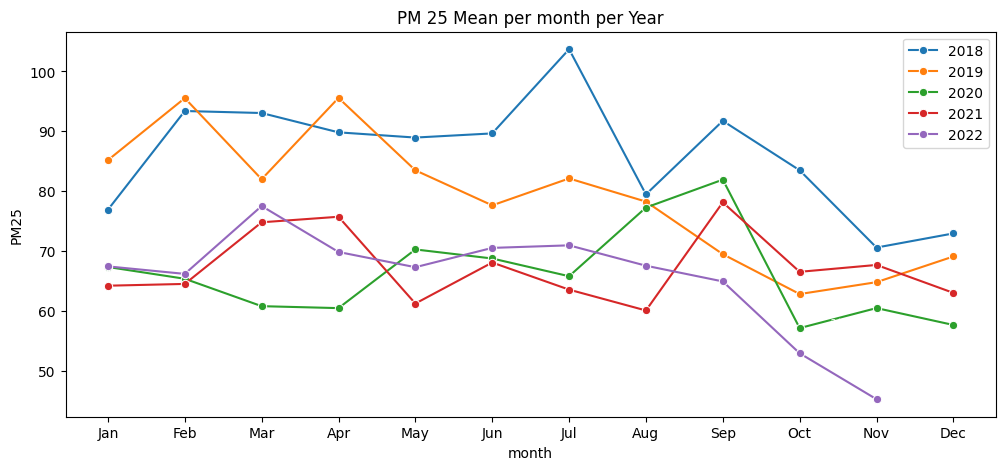

In [21]:
#df_all_month = PA75016_daily_cat.groupby(by=["year","month"]as_index=False).mean()
#df_all_month


import seaborn as sns 
#On veut plotter une année uniquement 
#Ensuite on veut plotter toutes les années sur un plot 

plt.figure(figsize=(12,5))

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


ax1 = sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[:12],
             marker = "o",label="2018")

sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[12:24],
             marker = "o",label="2019")

sns.lineplot(x = "month", y ="PM25", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")

sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[36:48],
             marker = "o",label="2021")

sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[48:59],
             marker = "o",label="2022").set_title("PM 25 Mean per month per Year")




ax1.text("Apr",58,"1er Confinement", 
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "white",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment


ax1.text("Nov",58,"2ème Confinement", 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
       color = "white",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.text("May",58,"3ème Confinement", 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "white",          # Color
       ha = "center", # Horizontal alignment
       va = "top") # Vertical alignment





plt.show()










#Ajout d'un marqueur de confinement



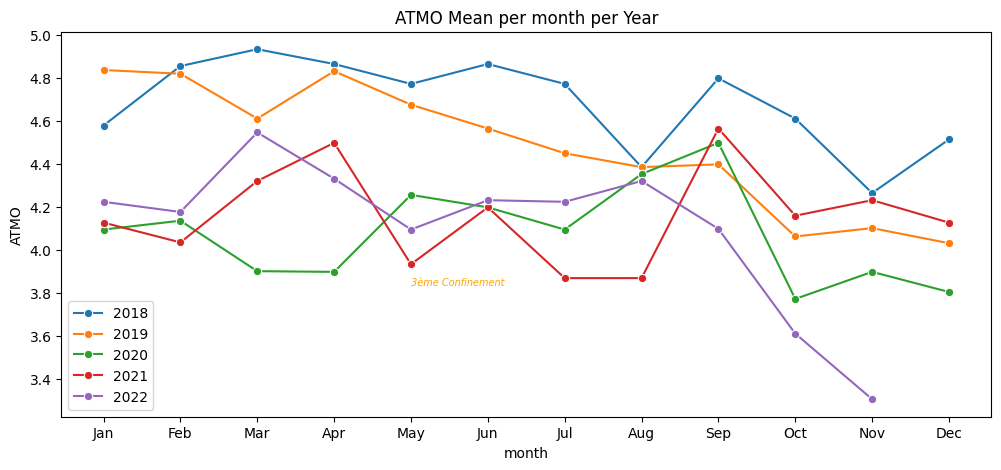

In [22]:
plt.figure(figsize=(12,5))

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


ax1 = sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[:12],
                   
             marker = "o",label="2018")

sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             
             marker = "o",label="2019")

sns.lineplot(x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             
             marker = "o",label="2020")

sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             
             marker = "o",label="2021")

sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             
             marker = "o",label="2022").set_title("ATMO Mean per month per Year")



ax1.text("Apr",3.8,"1er Confinement", 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "white",          # Color
       ha = "center", # Horizontal alignment
         
         
         
       va = "center") # Vertical alignment


ax1.text("Nov",3.8,"2ème Confinement", 
         
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
       color = "white",          # Color
         
         
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.text("May",3.85,"3ème Confinement", 
         
         
 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "orange",          # Color
         
       ha = "left", # Horizontal alignment
         
         
         
       va = "center") # Vertical alignment


plt.show()




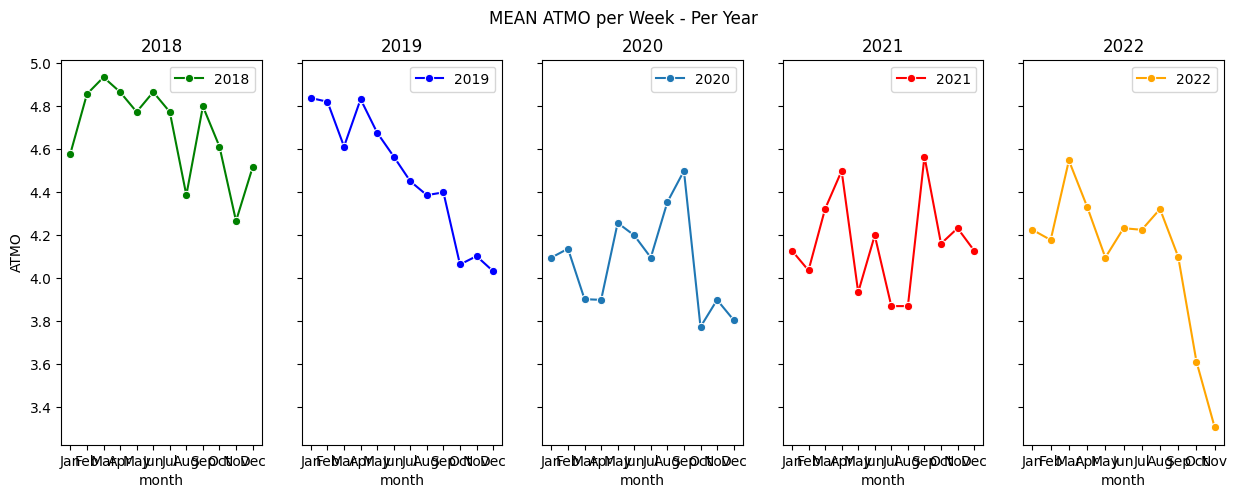

In [23]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('MEAN ATMO per Week - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
             marker = "o",label="2018",color = "green")
axes[0].set_title("2018")



# 2019
sns.lineplot(ax=axes[1],x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             marker = "o",label="2019",color="b")


axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")
axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             marker = "o",label="2021",color="r")

axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             marker = "o",label="2022",color="orange").set_title("ATMO Mean per Week per Year")

axes[4].set_title("2022")




#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()







In [24]:
df_mean_year = PA75016_daily_cat.groupby(by=["year"],as_index=False).mean()
df_mean_year



/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_61686/1966568787.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_year = PA75016_daily_cat.groupby(by=["year"],as_index=False).mean()


,year,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,month,weekday_name
0,2018,86.102274,17.196356,65.139178,4.684932,0.301370,1.041096,4.684932,26.430137,15.720548,6.526027,2.991781
1,2019,78.794490,15.632727,59.977686,4.482094,0.212121,0.947658,4.482094,26.311295,15.721763,6.498623,2.980716
2,2020,66.104918,12.760929,48.924044,4.076503,0.092896,0.661202,4.076503,26.928962,15.756831,6.513661,2.997268
3,2021,67.288242,14.755659,51.781319,4.162088,0.159341,0.706044,4.162088,26.634615,15.736264,6.538462,3.005495
4,2022,66.624858,14.783596,50.240379,4.151420,0.167192,0.687697,4.151420,23.182965,15.356467,5.750789,3.015773


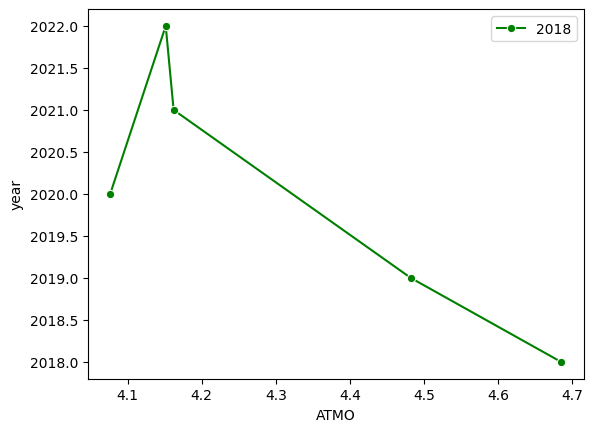

In [25]:
sns.lineplot( x = "ATMO", y = "year", data=df_mean_year.iloc[0:12],
             
             
             
             
             marker = "o",label="2018",color = "green")
plt.show()












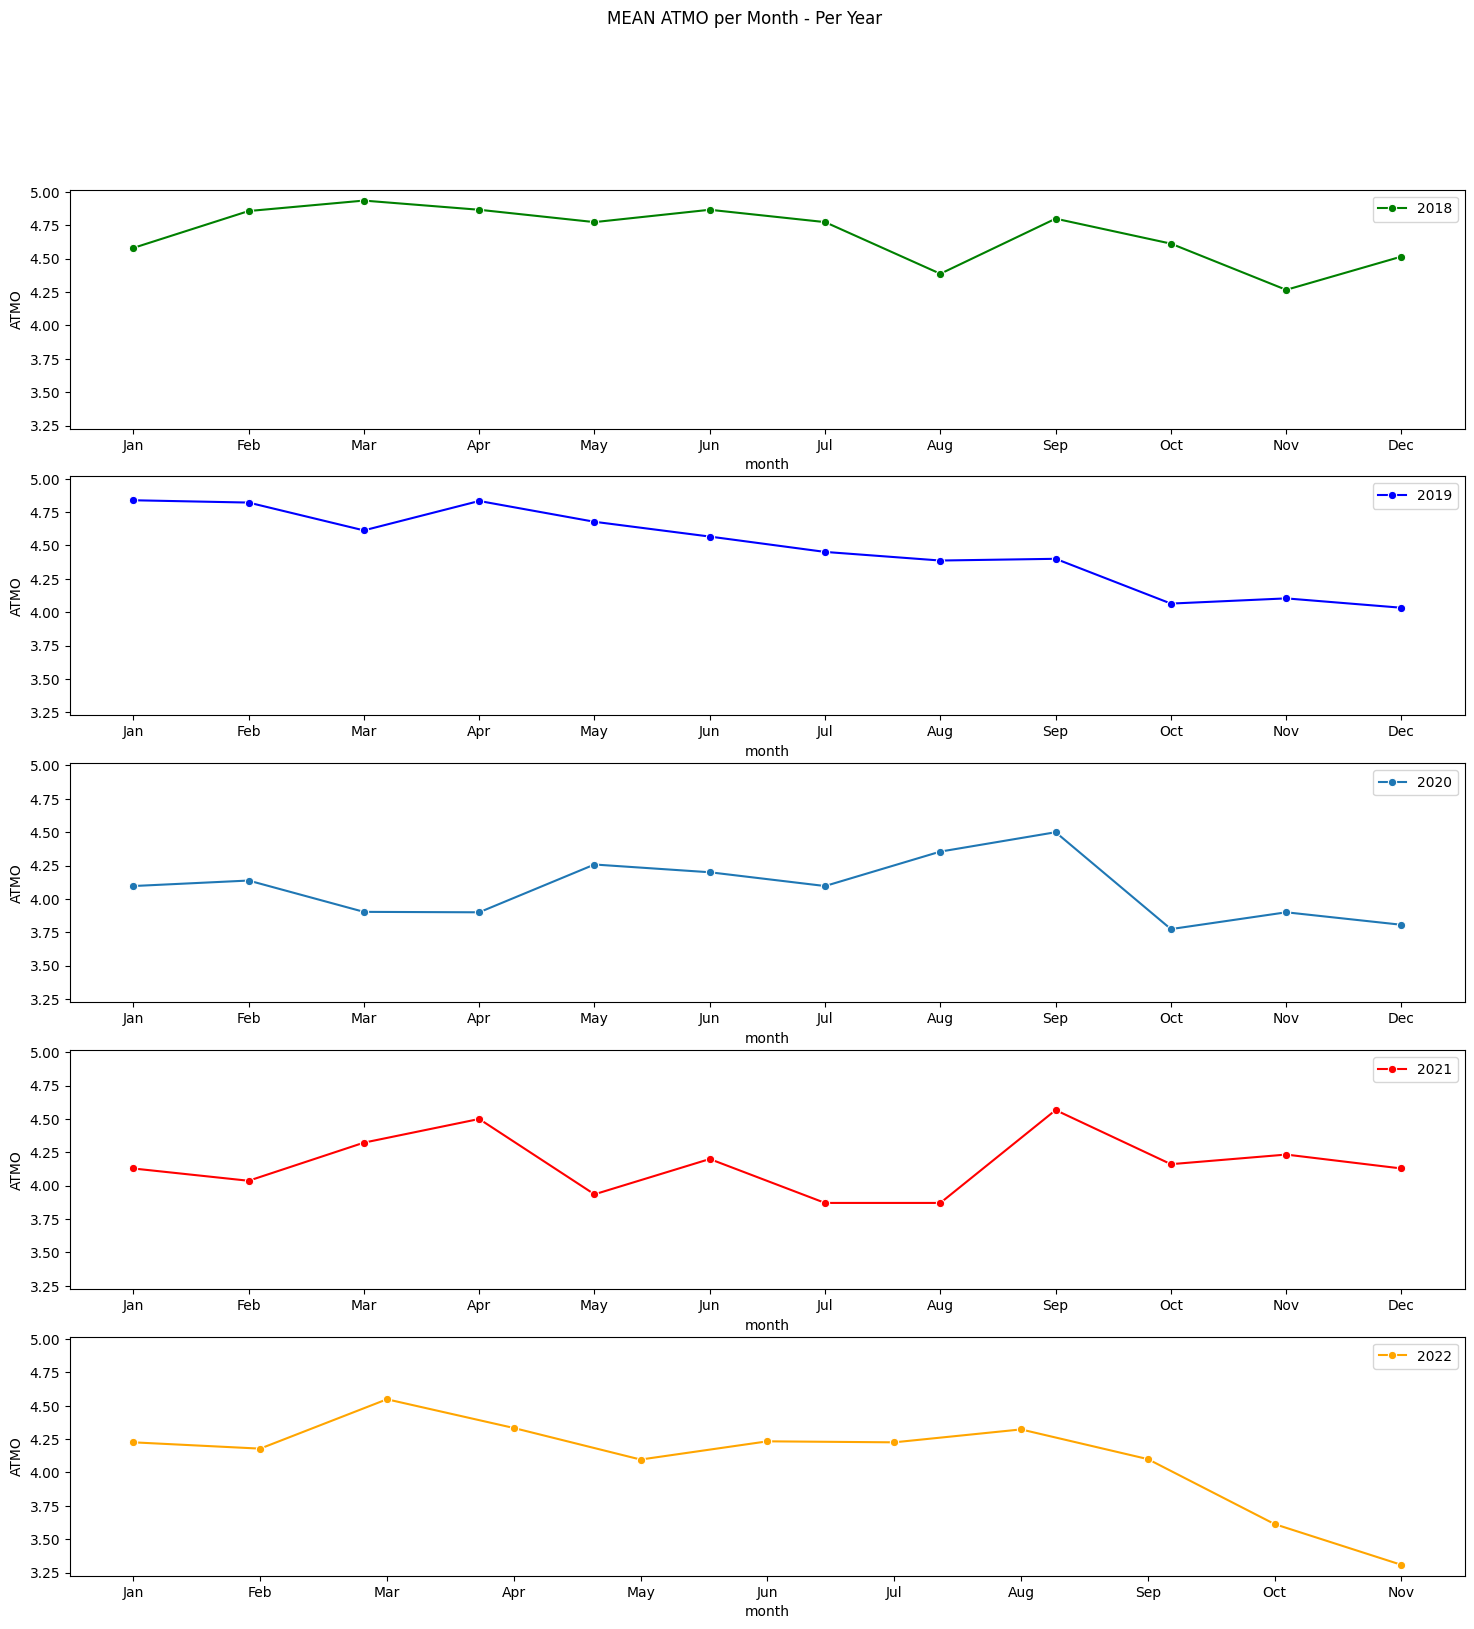

In [26]:
fig, axes = plt.subplots(5, 1, figsize=(18, 18), sharey=True)





fig.suptitle('MEAN ATMO per Month - Per Year')


# 2018
sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
             marker = "o",label="2018",color = "green")
#axes[0].set_title("2018")

#sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
            # marker = "o",label="2018",color = "green")
    



    



# 2019
sns.lineplot(ax=axes[1],x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             marker = "o",label="2019",color="b")


#axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")
#axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             marker = "o",label="2021",color="r")

#axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             marker = "o",label="2022",color="orange")


#axes[4].set_title("2022")





#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()

In [27]:
df_all_month[:]

,year,month,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,weekday_name
0,2018,Jan,76.916774,15.090968,45.022581,4.580645,0.225806,0.516129,4.580645,2.741935,16.000000,2.806452
1,2018,Feb,93.398929,23.745357,78.278571,4.857143,0.678571,1.321429,4.857143,6.928571,14.500000,3.000000
2,2018,Mar,93.063548,18.120323,68.622581,4.935484,0.322581,1.129032,4.935484,11.129032,16.000000,3.096774
3,2018,Apr,89.835667,15.195333,70.423333,4.866667,0.200000,1.233333,4.866667,15.500000,15.500000,3.000000
4,2018,May,88.965484,18.448065,70.487097,4.774194,0.354839,1.193548,4.774194,19.870968,16.000000,2.903226
5,2018,Jun,89.659333,17.202667,61.230000,4.866667,0.200000,1.033333,4.866667,24.200000,15.500000,3.100000
6,2018,Jul,103.715806,16.052903,74.529032,4.774194,0.258065,1.258065,4.774194,28.580645,16.000000,2.935484
7,2018,Aug,79.479677,12.781290,67.070968,4.387097,0.064516,1.129032,4.387097,33.000000,16.000000,3.000000
8,2018,Sep,91.754667,15.897000,73.986667,4.800000,0.200000,1.166667,4.800000,37.333333,15.500000,3.166667
9,2018,Oct,83.502258,18.715484,66.770968,4.612903,0.387097,1.000000,4.612903,41.741935,16.000000,2.806452


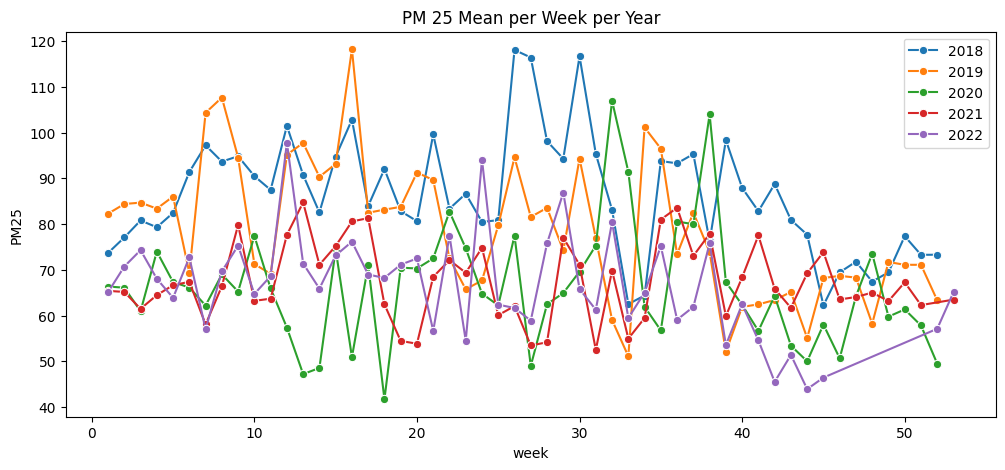

In [28]:
import seaborn as sns 
#On veut plotter une année uniquement 
#Ensuite on veut plotter toutes les années sur un plot 

plt.figure(figsize=(12,5))

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')






sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[:52],
             marker = "o",label="2018")




sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[52:104],
             marker = "o",label="2019")

sns.lineplot(x = "week", y ="PM25", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")

sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[156:208],
             marker = "o",label="2021")

sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[208:255],
             marker = "o",label="2022").set_title("PM 25 Mean per Week per Year")

plt.show()























In [29]:
df_all_year



,year,week,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,day,month,weekday_name
0,2018,1,73.682500,15.135000,37.875000,4.125000,0.125000,0.375000,4.125000,7.375000,2.375000,2.625
1,2018,2,77.072857,25.025714,73.642857,4.714286,0.857143,1.285714,4.714286,11.000000,1.000000,3.000
2,2018,3,80.787143,10.697143,34.928571,4.857143,0.000000,0.285714,4.857143,18.000000,1.000000,3.000
3,2018,4,79.305714,11.367143,36.642857,4.714286,0.000000,0.285714,4.714286,25.000000,1.000000,3.000
4,2018,5,82.448571,12.760000,47.100000,4.714286,0.000000,0.571429,4.714286,14.285714,1.571429,3.000
...,...,...,...,...,...,...,...,...,...,...,...,...
251,2022,42,45.527143,10.631429,33.300000,3.285714,0.000000,0.142857,3.285714,20.000000,10.000000,3.000
252,2022,43,51.402857,13.021429,37.671429,3.571429,0.000000,0.285714,3.571429,27.000000,10.000000,3.000
253,2022,44,43.937143,10.537143,31.385714,3.285714,0.000000,0.000000,3.285714,7.428571,10.857143,3.000
254,2022,45,46.451429,14.338571,45.814286,3.285714,0.285714,0.428571,3.285714,10.000000,11.000000,3.000


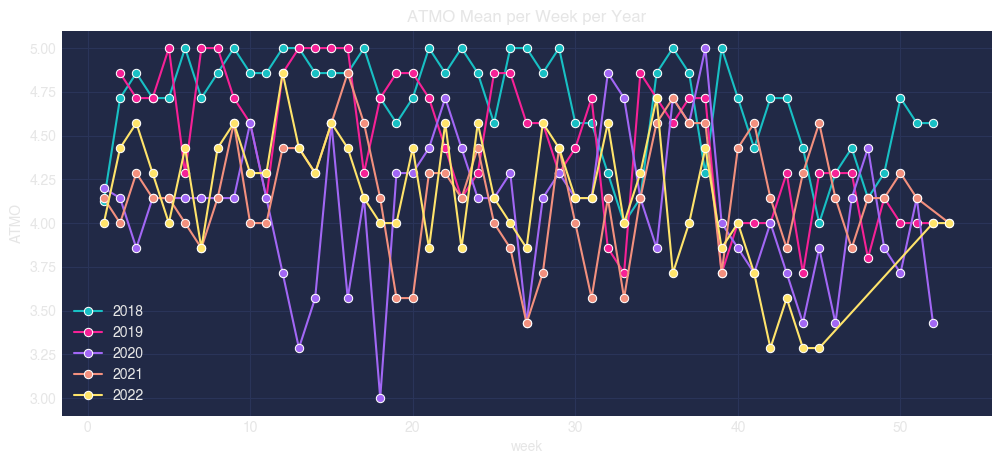

In [30]:

plt.figure(figsize=(12,5))

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')







sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018")




sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             marker = "o",label="2019")

sns.lineplot(x = "week", y ="ATMO", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")

sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[156:208],
             marker = "o",label="2021")

sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[208:255],
             marker = "o",label="2022").set_title("ATMO Mean per Week per Year")

plt.show()






In [31]:
f, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(13,3))


sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018") ax1.set_title("ATMO Mean per Week in 2018")ax[0]



#ax2.sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             #marker = "o",label="2019"); ax2.set_title("Multiplicative Model Residuals");

    
    

    

SyntaxError: invalid syntax (912250516.py, line 5)

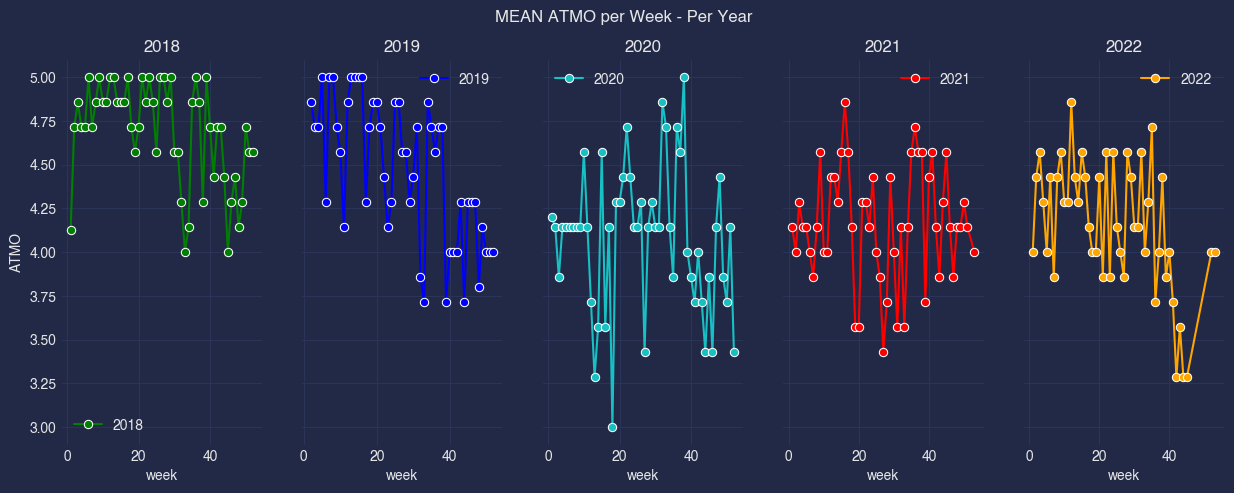

In [32]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('MEAN ATMO per Week - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018",color = "green")
axes[0].set_title("2018")



# 2019
sns.lineplot(ax=axes[1],x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             marker = "o",label="2019",color="b")


axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "week", y ="ATMO", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")
axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "week", y = "ATMO", data=df_all_year.iloc[156:208],
             marker = "o",label="2021",color="r")

axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "week", y = "ATMO", data=df_all_year.iloc[208:255],
             marker = "o",label="2022",color="orange").set_title("ATMO Mean per Week per Year")

axes[4].set_title("2022")



#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()












In [33]:
df_mean_year



,year,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,month,weekday_name
0,2018,86.102274,17.196356,65.139178,4.684932,0.301370,1.041096,4.684932,26.430137,15.720548,6.526027,2.991781
1,2019,78.794490,15.632727,59.977686,4.482094,0.212121,0.947658,4.482094,26.311295,15.721763,6.498623,2.980716
2,2020,66.104918,12.760929,48.924044,4.076503,0.092896,0.661202,4.076503,26.928962,15.756831,6.513661,2.997268
3,2021,67.288242,14.755659,51.781319,4.162088,0.159341,0.706044,4.162088,26.634615,15.736264,6.538462,3.005495
4,2022,66.624858,14.783596,50.240379,4.151420,0.167192,0.687697,4.151420,23.182965,15.356467,5.750789,3.015773


In [34]:
plt.plot([0,df_mean_year["ATMO"][0] ], [0,df_mean_year["ATMO"][0]], linewidth=2)
plt.show







<function matplotlib.pyplot.show(close=None, block=None)>

In [36]:
import matplotlib.pyplot as plt
plt.axline(xy1=(0,0),xy2=(0,df_mean_year["ATMO"][0]))
plt.show;







           
    
           
           




In [37]:
plt.plot([0,2], [0,4], linewidth=2)

plt.show;




In [38]:
sns.lineplot(ax=axes[0], x ="year" , y = "ATMO", data=df_mean_year.iloc[:52],
             marker = "o",label="Mean 2018",color = "green")


<AxesSubplot: title={'center': '2018'}, xlabel='week', ylabel='ATMO'>

In [77]:
df_all_year


,year,week,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,day,month,weekday_name
0,2018,1,73.682500,15.135000,37.875000,4.125000,0.125000,0.375000,4.125000,7.375000,2.375000,2.625
1,2018,2,77.072857,25.025714,73.642857,4.714286,0.857143,1.285714,4.714286,11.000000,1.000000,3.000
2,2018,3,80.787143,10.697143,34.928571,4.857143,0.000000,0.285714,4.857143,18.000000,1.000000,3.000
3,2018,4,79.305714,11.367143,36.642857,4.714286,0.000000,0.285714,4.714286,25.000000,1.000000,3.000
4,2018,5,82.448571,12.760000,47.100000,4.714286,0.000000,0.571429,4.714286,14.285714,1.571429,3.000
...,...,...,...,...,...,...,...,...,...,...,...,...
251,2022,42,45.527143,10.631429,33.300000,3.285714,0.000000,0.142857,3.285714,20.000000,10.000000,3.000
252,2022,43,51.402857,13.021429,37.671429,3.571429,0.000000,0.285714,3.571429,27.000000,10.000000,3.000
253,2022,44,43.937143,10.537143,31.385714,3.285714,0.000000,0.000000,3.285714,7.428571,10.857143,3.000
254,2022,45,46.451429,14.338571,45.814286,3.285714,0.285714,0.428571,3.285714,10.000000,11.000000,3.000


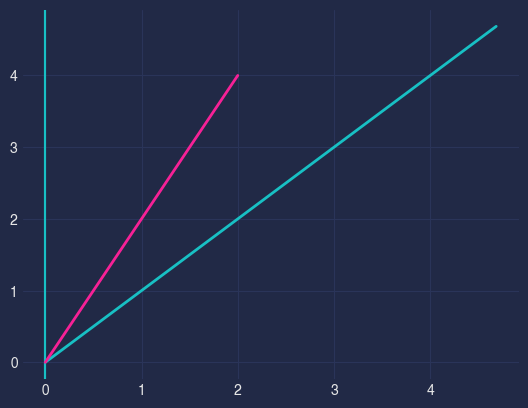

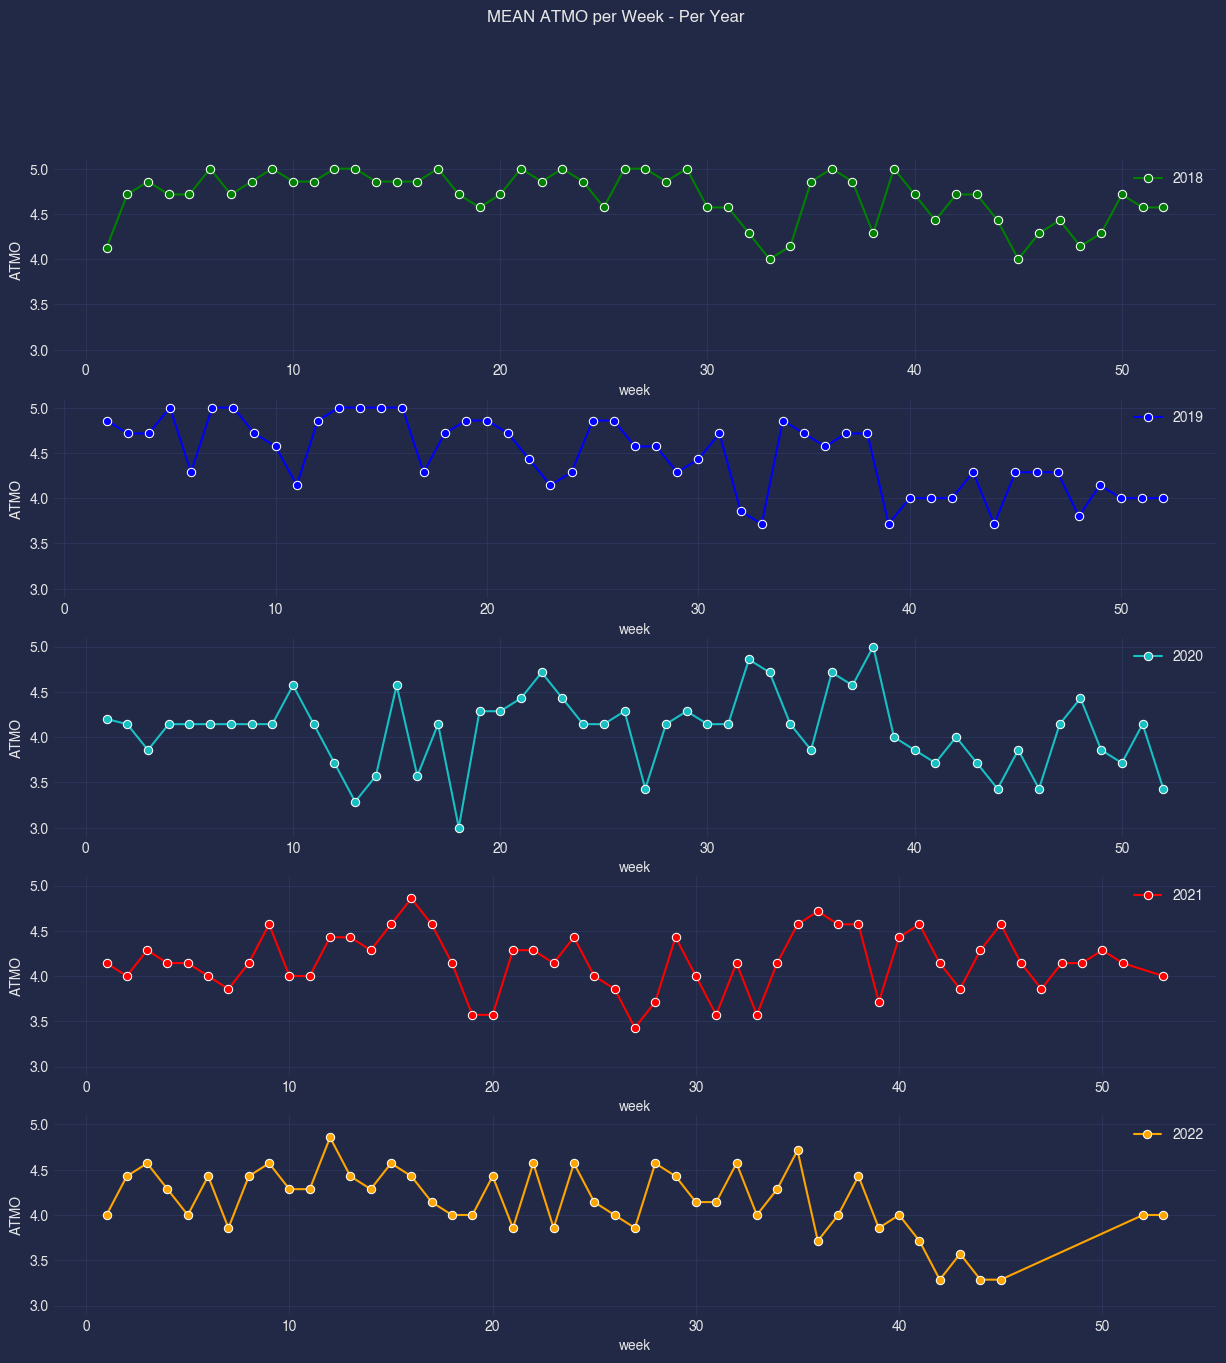

In [39]:
import numpy as np


fig, axes = plt.subplots(5, 1, figsize=(15, 15), sharey=True)




fig.suptitle('MEAN ATMO per Week - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018",color = "green")


#on veut tracer une ligne droite qui prend en y l'ATMO moyen de l'année 

#sns.lineplot(ax=axes[0], x = , y = "ATMO", data=df_mean_year.iloc[:52],marker = "o",label="Mean 2018",color = "green")





#axes[0].set_title("2018")





# 2019
sns.lineplot(ax=axes[1],x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             marker = "o",label="2019",color="b")


#axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "week", y ="ATMO", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")
#axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "week", y = "ATMO", data=df_all_year.iloc[156:208],
             marker = "o",label="2021",color="r")

#axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "week", y = "ATMO", data=df_all_year.iloc[208:255],
             marker = "o",label="2022",color="orange")


#axes[4].set_title("2022")



#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()










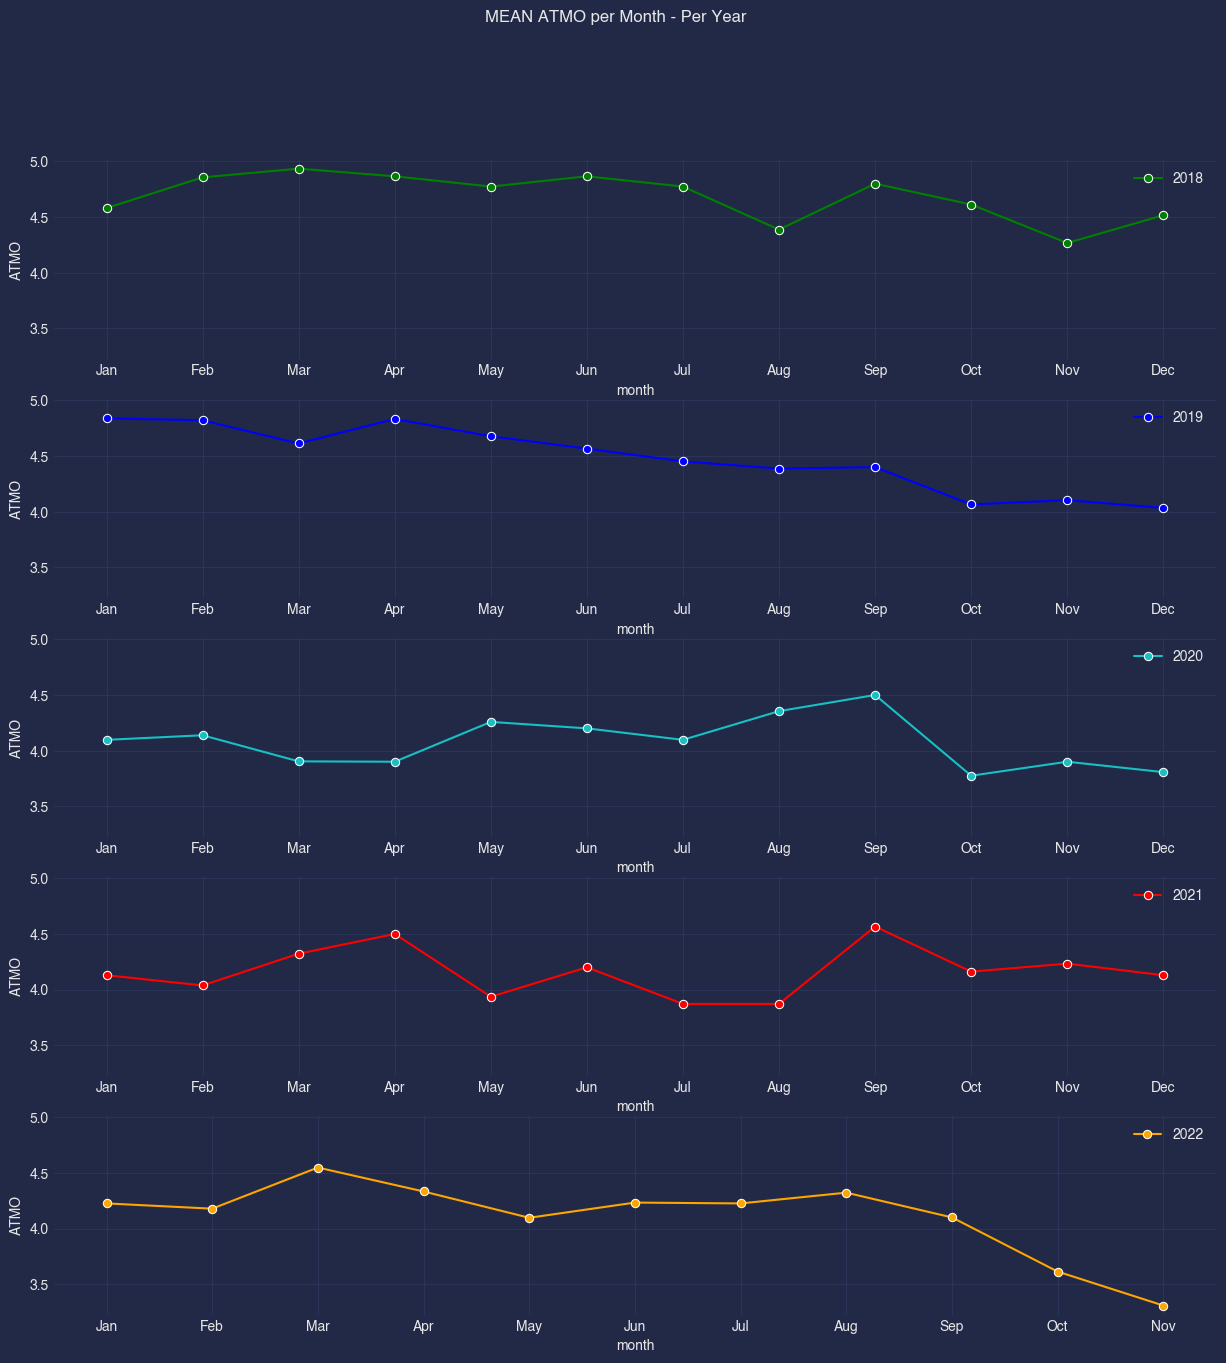

In [40]:
import numpy as np


fig, axes = plt.subplots(5, 1, figsize=(15, 15), sharey=True)




fig.suptitle('MEAN ATMO per Month - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
             marker = "o",label="2018",color = "green")


#on veut tracer une ligne droite qui prend en y l'ATMO moyen de l'année 

#sns.lineplot(ax=axes[0], x = , y = "ATMO", data=df_mean_month.iloc[:52],marker = "o",label="Mean 2018",color = "green")




#axes[0].set_title("2018")





# 2019
sns.lineplot(ax=axes[1],x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             marker = "o",label="2019",color="b")


#axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")
#axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             marker = "o",label="2021",color="r")

#axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             marker = "o",label="2022",color="orange")


#axes[4].set_title("2022")



#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()













In [41]:
PA75016_daily_cat.head(10)




,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month,weekday_name
0,2018-01-01,71.10,13.00,29.9,4,0,0,4,2018,1,1,1,0
1,2018-01-02,71.10,13.00,29.9,4,0,0,4,2018,1,2,1,1
2,2018-01-03,71.10,13.00,29.9,4,0,0,4,2018,1,3,1,2
3,2018-01-04,71.10,13.00,29.9,4,0,0,4,2018,1,4,1,3
4,2018-01-05,71.10,12.83,36.2,4,0,0,4,2018,1,5,1,4
5,2018-01-06,71.10,17.20,54.7,4,0,1,4,2018,1,6,1,5
6,2018-01-07,71.10,22.75,43.0,4,1,1,4,2018,1,7,1,6
7,2018-01-08,75.84,21.22,68.0,5,1,1,5,2018,2,8,1,0
8,2018-01-09,61.04,23.33,69.0,4,1,1,4,2018,2,9,1,1
9,2018-01-10,83.58,13.71,66.1,5,0,1,5,2018,2,10,1,2


In [42]:
df_days




NameError: name 'df_days' is not defined

In [43]:
#import calendar
df_days_1 = PA75016_daily_cat.copy()
df_days_1['weekday_name'] = df_days_1['weekday_name'].apply(lambda x: calendar.day_name[x])
df_days_1









,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month,weekday_name
0,2018-01-01,71.10,13.00,29.9,4,0,0,4,2018,1,1,1,Monday
1,2018-01-02,71.10,13.00,29.9,4,0,0,4,2018,1,2,1,Tuesday
2,2018-01-03,71.10,13.00,29.9,4,0,0,4,2018,1,3,1,Wednesday
3,2018-01-04,71.10,13.00,29.9,4,0,0,4,2018,1,4,1,Thursday
4,2018-01-05,71.10,12.83,36.2,4,0,0,4,2018,1,5,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2022-11-09,57.41,9.46,36.0,4,0,0,4,2022,45,9,11,Wednesday
1771,2022-11-10,55.69,13.10,42.8,4,0,1,4,2022,45,10,11,Thursday
1772,2022-11-11,35.26,10.79,25.7,3,0,0,3,2022,45,11,11,Friday
1773,2022-11-12,49.01,23.87,82.2,3,1,1,3,2022,45,12,11,Saturday


In [45]:
PA75016_daily_cat



,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month,weekday_name
0,2018-01-01,71.10,13.00,29.9,4,0,0,4,2018,1,1,1,0
1,2018-01-02,71.10,13.00,29.9,4,0,0,4,2018,1,2,1,1
2,2018-01-03,71.10,13.00,29.9,4,0,0,4,2018,1,3,1,2
3,2018-01-04,71.10,13.00,29.9,4,0,0,4,2018,1,4,1,3
4,2018-01-05,71.10,12.83,36.2,4,0,0,4,2018,1,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2022-11-09,57.41,9.46,36.0,4,0,0,4,2022,45,9,11,2
1771,2022-11-10,55.69,13.10,42.8,4,0,1,4,2022,45,10,11,3
1772,2022-11-11,35.26,10.79,25.7,3,0,0,3,2022,45,11,11,4
1773,2022-11-12,49.01,23.87,82.2,3,1,1,3,2022,45,12,11,5


In [44]:
PA75016_daily_cat




,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month,weekday_name
0,2018-01-01,71.10,13.00,29.9,4,0,0,4,2018,1,1,1,0
1,2018-01-02,71.10,13.00,29.9,4,0,0,4,2018,1,2,1,1
2,2018-01-03,71.10,13.00,29.9,4,0,0,4,2018,1,3,1,2
3,2018-01-04,71.10,13.00,29.9,4,0,0,4,2018,1,4,1,3
4,2018-01-05,71.10,12.83,36.2,4,0,0,4,2018,1,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2022-11-09,57.41,9.46,36.0,4,0,0,4,2022,45,9,11,2
1771,2022-11-10,55.69,13.10,42.8,4,0,1,4,2022,45,10,11,3
1772,2022-11-11,35.26,10.79,25.7,3,0,0,3,2022,45,11,11,4
1773,2022-11-12,49.01,23.87,82.2,3,1,1,3,2022,45,12,11,5


In [46]:
df_days_1 =  df_days_1.groupby(by=['weekday_name'],as_index=False).mean()
df_days_1



df_days_1.sort_values(by=['weekday_name'])










#On veut La moyenne de chaque jour de la semaine 
#il faut donc faire une fonction qui permet de transcrire que le jour de la semaine 


/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_61686/3626659711.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_days_1 =  df_days_1.groupby(by=['weekday_name'],as_index=False).mean()


,weekday_name,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month
0,Friday,76.911142,15.398346,58.256693,4.444882,0.185039,0.881890,4.444882,2019.948819,25.984252,15.622047,6.385827
1,Monday,72.955236,14.400394,54.742520,4.318898,0.165354,0.783465,4.318898,2019.937008,25.984252,15.692913,6.393701
2,Saturday,72.117352,15.296838,50.878656,4.304348,0.197628,0.719368,4.304348,2019.956522,25.897233,15.600791,6.351779
3,Sunday,64.838458,14.214783,46.681818,3.996047,0.169960,0.596838,3.996047,2019.956522,25.897233,15.758893,6.379447
4,Thursday,75.768819,15.239764,58.898819,4.366142,0.188976,0.921260,4.366142,2019.944882,25.984252,15.696850,6.397638
5,Tuesday,74.956181,14.926496,57.245276,4.374016,0.196850,0.858268,4.374016,2019.940945,25.984252,15.618110,6.381890
6,Wednesday,74.454941,15.738182,60.645455,4.403162,0.205534,0.920949,4.403162,2019.940711,26.063241,15.675889,6.383399


In [47]:
sns.barplot(data=df_days,x="weekday_name",y="ATMO")




plt.show()










NameError: name 'df_days' is not defined

In [48]:
sns.barplot(data=df_days,x="weekday_name",y="PM25")








plt.show()

NameError: name 'df_days' is not defined

In [49]:
PA75016_daily_cat



,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month,weekday_name
0,2018-01-01,71.10,13.00,29.9,4,0,0,4,2018,1,1,1,0
1,2018-01-02,71.10,13.00,29.9,4,0,0,4,2018,1,2,1,1
2,2018-01-03,71.10,13.00,29.9,4,0,0,4,2018,1,3,1,2
3,2018-01-04,71.10,13.00,29.9,4,0,0,4,2018,1,4,1,3
4,2018-01-05,71.10,12.83,36.2,4,0,0,4,2018,1,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2022-11-09,57.41,9.46,36.0,4,0,0,4,2022,45,9,11,2
1771,2022-11-10,55.69,13.10,42.8,4,0,1,4,2022,45,10,11,3
1772,2022-11-11,35.26,10.79,25.7,3,0,0,3,2022,45,11,11,4
1773,2022-11-12,49.01,23.87,82.2,3,1,1,3,2022,45,12,11,5


In [50]:
from workflow.data_viz import data_viz

data_viz(PA75016_daily_cat)












/Users/Edouard_1/code/TheLab75/ParisDeepAirProject/workflow/data_viz.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = df["Date_time"].dt.week


,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month,weekday_name
0,2018-01-01,71.10,13.00,29.9,4,0,0,4,2018,1,1,1,0
1,2018-01-02,71.10,13.00,29.9,4,0,0,4,2018,1,2,1,1
2,2018-01-03,71.10,13.00,29.9,4,0,0,4,2018,1,3,1,2
3,2018-01-04,71.10,13.00,29.9,4,0,0,4,2018,1,4,1,3
4,2018-01-05,71.10,12.83,36.2,4,0,0,4,2018,1,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2022-11-09,57.41,9.46,36.0,4,0,0,4,2022,45,9,11,2
1771,2022-11-10,55.69,13.10,42.8,4,0,1,4,2022,45,10,11,3
1772,2022-11-11,35.26,10.79,25.7,3,0,0,3,2022,45,11,11,4
1773,2022-11-12,49.01,23.87,82.2,3,1,1,3,2022,45,12,11,5


In [51]:
df_all_day = PA75016_daily_cat.groupby(by=["day","year"],as_index=False).mean()

df_all_day






/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_61686/3384215004.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_all_day = PA75016_daily_cat.groupby(by=["day","year"],as_index=False).mean()


,day,year,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,month,weekday_name
0,1,2018,83.503333,15.028333,54.325000,4.583333,0.083333,0.833333,4.583333,24.333333,6.500000,3.166667
1,1,2019,74.590909,16.778182,54.654545,4.363636,0.181818,0.909091,4.363636,22.363636,6.000000,2.727273
2,1,2020,55.680833,11.080000,43.291667,3.666667,0.083333,0.500000,3.666667,24.750000,6.500000,3.083333
3,1,2021,71.888333,16.045833,51.191667,4.333333,0.333333,0.750000,4.333333,28.416667,6.500000,2.500000
4,1,2022,59.406364,12.885455,40.909091,4.000000,0.090909,0.454545,4.000000,26.636364,6.000000,2.909091
...,...,...,...,...,...,...,...,...,...,...,...,...
150,31,2018,81.165714,12.830000,54.371429,4.714286,0.000000,0.857143,4.714286,21.571429,6.571429,2.428571
151,31,2019,80.087143,22.368571,65.585714,4.571429,0.714286,1.142857,4.571429,21.571429,6.571429,3.428571
152,31,2020,70.801429,12.507143,67.371429,4.142857,0.000000,1.000000,4.142857,29.285714,6.571429,3.285714
153,31,2021,70.477143,12.870000,47.300000,4.000000,0.142857,0.428571,4.000000,28.428571,6.571429,3.428571


In [54]:
PA75016_daily_cat



,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month,weekday_name
0,2018-01-01,71.10,13.00,29.9,4,0,0,4,2018,1,1,1,0
1,2018-01-02,71.10,13.00,29.9,4,0,0,4,2018,1,2,1,1
2,2018-01-03,71.10,13.00,29.9,4,0,0,4,2018,1,3,1,2
3,2018-01-04,71.10,13.00,29.9,4,0,0,4,2018,1,4,1,3
4,2018-01-05,71.10,12.83,36.2,4,0,0,4,2018,1,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2022-11-09,57.41,9.46,36.0,4,0,0,4,2022,45,9,11,2
1771,2022-11-10,55.69,13.10,42.8,4,0,1,4,2022,45,10,11,3
1772,2022-11-11,35.26,10.79,25.7,3,0,0,3,2022,45,11,11,4
1773,2022-11-12,49.01,23.87,82.2,3,1,1,3,2022,45,12,11,5


In [53]:
df_all_day[df_all_day["year"]==2018]



,day,year,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,month,weekday_name
0,1,2018,83.503333,15.028333,54.325000,4.583333,0.083333,0.833333,4.583333,24.333333,6.500000,3.166667
5,2,2018,88.180000,14.965000,61.816667,4.750000,0.083333,0.916667,4.750000,24.500000,6.500000,3.000000
10,3,2018,95.949167,15.577500,71.966667,4.833333,0.166667,1.250000,4.833333,24.666667,6.500000,2.833333
15,4,2018,87.021667,15.626667,55.525000,4.750000,0.166667,0.833333,4.750000,24.750000,6.500000,3.250000
20,5,2018,86.500000,18.953333,65.825000,4.750000,0.500000,1.000000,4.750000,25.000000,6.500000,2.500000
25,6,2018,93.129167,17.845833,60.125000,4.833333,0.250000,1.000000,4.833333,25.083333,6.500000,2.916667
30,7,2018,90.950000,17.219167,56.516667,4.666667,0.333333,0.916667,4.666667,25.166667,6.500000,3.333333
35,8,2018,90.246667,18.870833,76.975000,4.750000,0.416667,1.166667,4.750000,25.333333,6.500000,3.166667
40,9,2018,83.541667,19.649167,75.225000,4.583333,0.500000,1.250000,4.583333,25.500000,6.500000,3.000000
45,10,2018,79.733333,15.640000,60.883333,4.583333,0.166667,1.000000,4.583333,25.666667,6.500000,2.833333


In [55]:
PA75016_daily_cat[:365]


                  
    
    

,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,year,week,day,month,weekday_name
0,2018-01-01,71.10,13.00,29.9,4,0,0,4,2018,1,1,1,0
1,2018-01-02,71.10,13.00,29.9,4,0,0,4,2018,1,2,1,1
2,2018-01-03,71.10,13.00,29.9,4,0,0,4,2018,1,3,1,2
3,2018-01-04,71.10,13.00,29.9,4,0,0,4,2018,1,4,1,3
4,2018-01-05,71.10,12.83,36.2,4,0,0,4,2018,1,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,60.22,28.80,62.0,4,1,1,4,2018,52,27,12,3
361,2018-12-28,79.23,35.96,73.6,5,1,1,5,2018,52,28,12,4
362,2018-12-29,74.37,32.03,70.5,4,1,1,4,2018,52,29,12,5
363,2018-12-30,80.70,19.72,43.6,5,0,1,5,2018,52,30,12,6


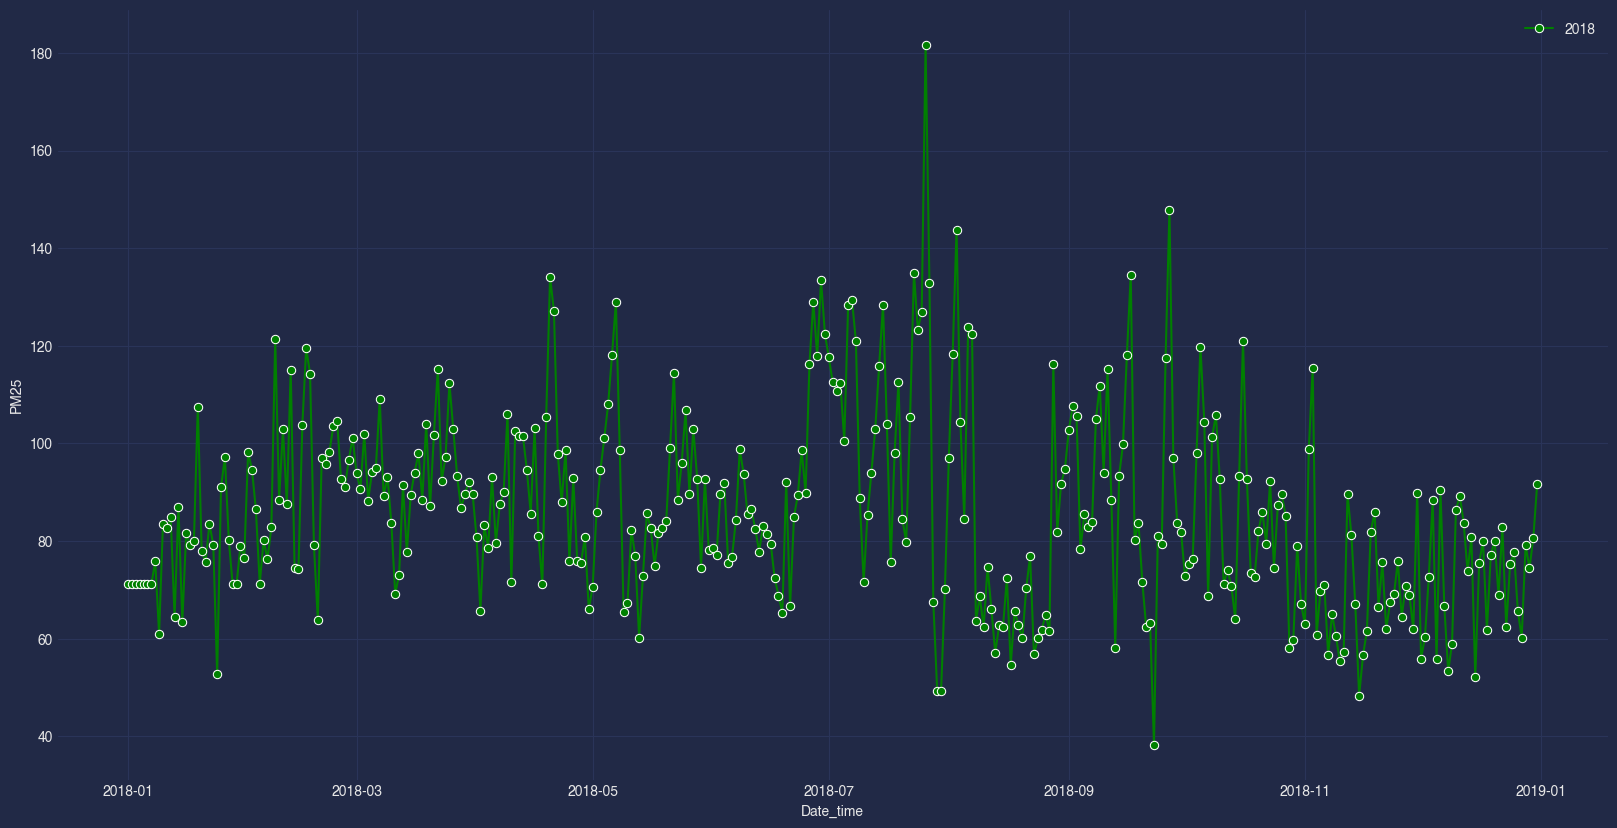

In [56]:

plt.figure(figsize=(20,10))



plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


fig.suptitle('MEAN PM25 per Month - Per Year')


# 2018
sns.lineplot( x = "Date_time", y = "PM25", data=PA75016_daily_cat[:365],
             
             
             marker = "o",label="2018",color = "green")

plt.show()







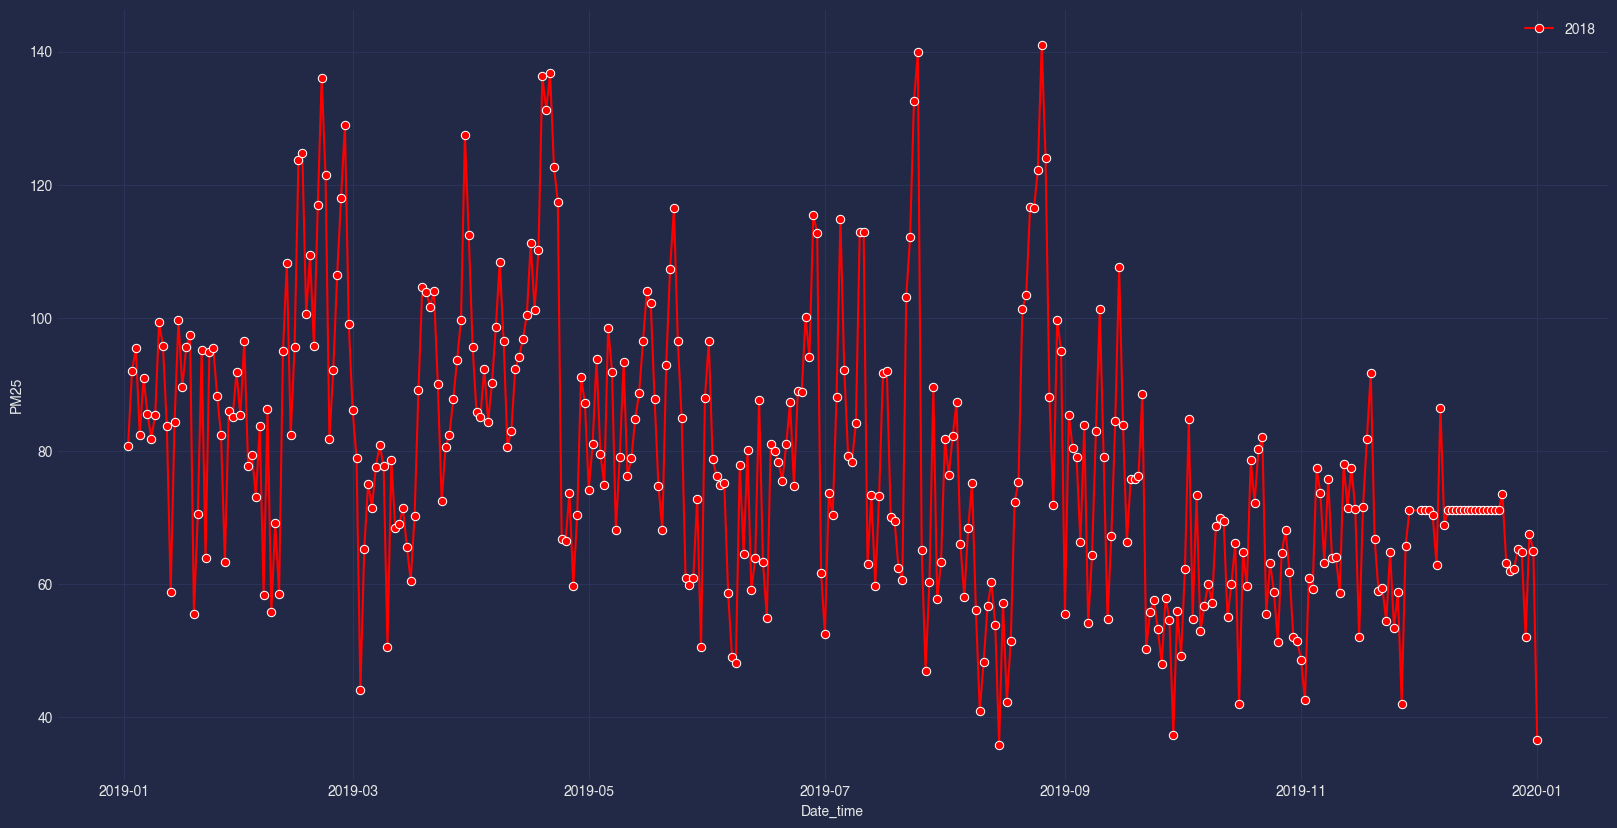

In [57]:
plt.figure(figsize=(20,10))



plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


fig.suptitle('MEAN PM25 per Month - Per Year')


# 2018
sns.lineplot( x = "Date_time", y = "PM25", data=PA75016_daily_cat[366:729],
             
             
             
             marker = "o",label="2018",color = "red")



plt.show()




In [58]:
import numpy as np



In [59]:
df_test = PA75016_daily_cat[["PM25","Date_time"]]
df_test




,PM25,Date_time
0,71.10,2018-01-01
1,71.10,2018-01-02
2,71.10,2018-01-03
3,71.10,2018-01-04
4,71.10,2018-01-05
...,...,...
1770,57.41,2022-11-09
1771,55.69,2022-11-10
1772,35.26,2022-11-11
1773,49.01,2022-11-12


In [60]:
df_test["J-1"] = df_test["PM25"].shift(1)
df_test["J-2"] = df_test["PM25"].shift(2)
df_test["J-3"] = df_test["PM25"].shift(3)
df_test["J-4"] = df_test["PM25"].shift(4)
df_test["J-5"] = df_test["PM25"].shift(5)
df_test["J-6"] = df_test["PM25"].shift(6)
df_test["J-7"] = df_test["PM25"].shift(7)


#df_test["mean shift"] = df_test[["J-1","J-2","J-3","J-4","J-5","J-6","J-7"]].mean()
df_test



#PA75016_daily_cat = PA75016_daily_cat.dropna()
#PA75016_daily_cat














/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_61686/1919852714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["J-1"] = df_test["PM25"].shift(1)
/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_61686/1919852714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["J-2"] = df_test["PM25"].shift(2)
/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_61686/1919852714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,PM25,Date_time,J-1,J-2,J-3,J-4,J-5,J-6,J-7
0,71.10,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,71.10,2018-01-02,71.10,NaN,NaN,NaN,NaN,NaN,NaN
2,71.10,2018-01-03,71.10,71.10,NaN,NaN,NaN,NaN,NaN
3,71.10,2018-01-04,71.10,71.10,71.10,NaN,NaN,NaN,NaN
4,71.10,2018-01-05,71.10,71.10,71.10,71.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1770,57.41,2022-11-09,40.96,43.02,36.53,53.37,53.00,46.97,45.75
1771,55.69,2022-11-10,57.41,40.96,43.02,36.53,53.37,53.00,46.97
1772,35.26,2022-11-11,55.69,57.41,40.96,43.02,36.53,53.37,53.00
1773,49.01,2022-11-12,35.26,55.69,57.41,40.96,43.02,36.53,53.37


In [62]:
df_test = df_test.dropna()
df_test







,PM25,Date_time,J-1,J-2,J-3,J-4,J-5,J-6,J-7
7,75.84,2018-01-08,71.10,71.10,71.10,71.10,71.10,71.10,71.10
8,61.04,2018-01-09,75.84,71.10,71.10,71.10,71.10,71.10,71.10
9,83.58,2018-01-10,61.04,75.84,71.10,71.10,71.10,71.10,71.10
10,82.75,2018-01-11,83.58,61.04,75.84,71.10,71.10,71.10,71.10
11,84.88,2018-01-12,82.75,83.58,61.04,75.84,71.10,71.10,71.10
...,...,...,...,...,...,...,...,...,...
1770,57.41,2022-11-09,40.96,43.02,36.53,53.37,53.00,46.97,45.75
1771,55.69,2022-11-10,57.41,40.96,43.02,36.53,53.37,53.00,46.97
1772,35.26,2022-11-11,55.69,57.41,40.96,43.02,36.53,53.37,53.00
1773,49.01,2022-11-12,35.26,55.69,57.41,40.96,43.02,36.53,53.37


In [63]:
df_test["mean_shift"]=df_test[["J-1","J-2","J-3","J-4","J-5","J-6","J-7"]].mean(axis=1)
df_test








,PM25,Date_time,J-1,J-2,J-3,J-4,J-5,J-6,J-7,mean_shift
7,75.84,2018-01-08,71.10,71.10,71.10,71.10,71.10,71.10,71.10,71.100000
8,61.04,2018-01-09,75.84,71.10,71.10,71.10,71.10,71.10,71.10,71.777143
9,83.58,2018-01-10,61.04,75.84,71.10,71.10,71.10,71.10,71.10,70.340000
10,82.75,2018-01-11,83.58,61.04,75.84,71.10,71.10,71.10,71.10,72.122857
11,84.88,2018-01-12,82.75,83.58,61.04,75.84,71.10,71.10,71.10,73.787143
...,...,...,...,...,...,...,...,...,...,...
1770,57.41,2022-11-09,40.96,43.02,36.53,53.37,53.00,46.97,45.75,45.657143
1771,55.69,2022-11-10,57.41,40.96,43.02,36.53,53.37,53.00,46.97,47.322857
1772,35.26,2022-11-11,55.69,57.41,40.96,43.02,36.53,53.37,53.00,48.568571
1773,49.01,2022-11-12,35.26,55.69,57.41,40.96,43.02,36.53,53.37,46.034286


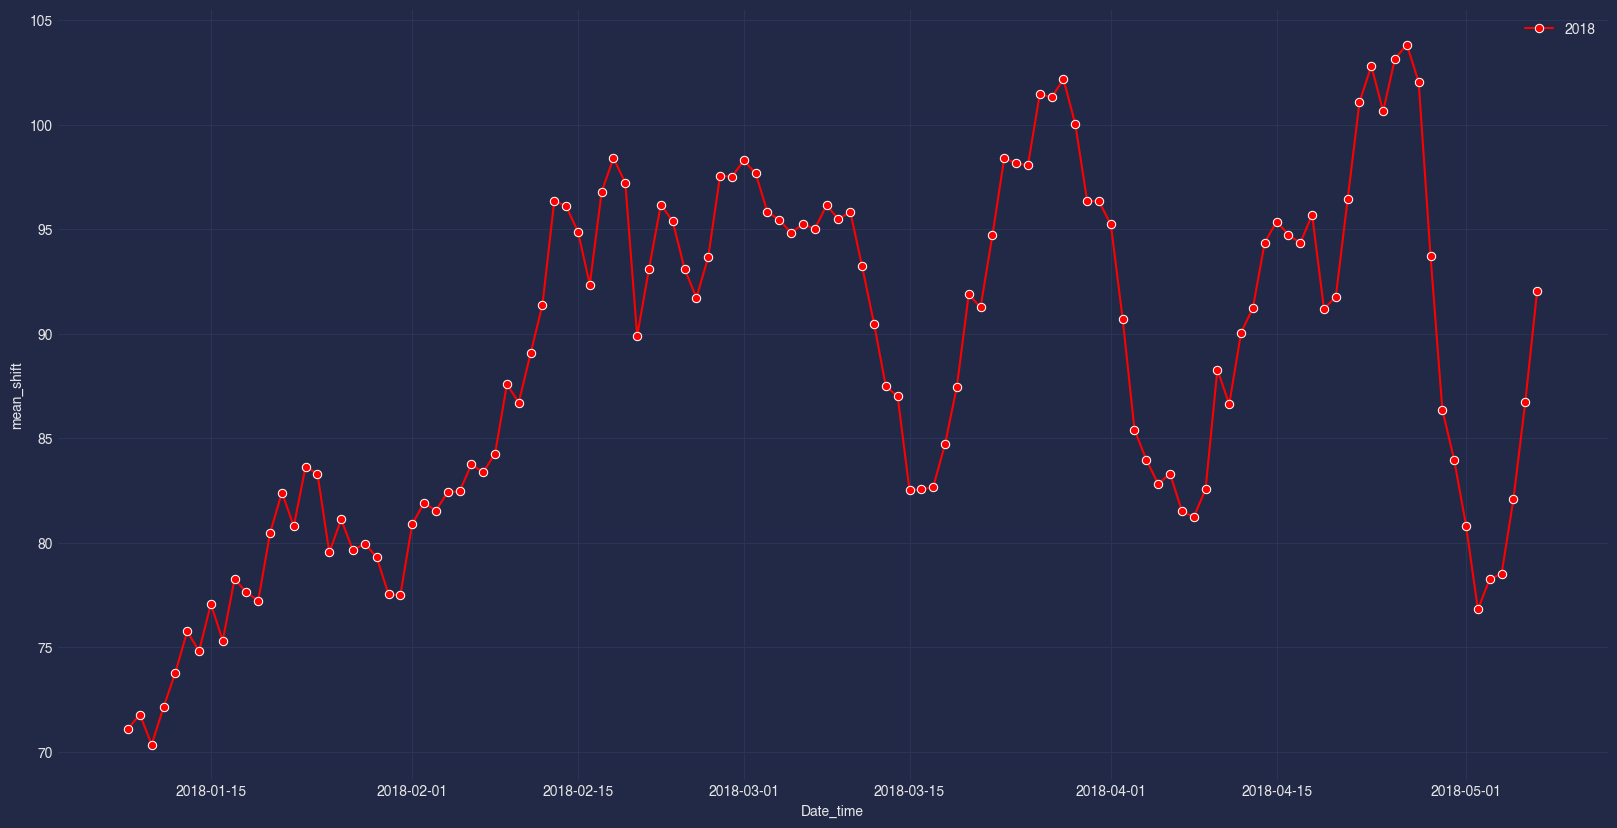

In [64]:
plt.figure(figsize=(20,10))




plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


fig.suptitle('MEAN PM25 per Month - Per Year')


# 2018
sns.lineplot( x = "Date_time", y = "mean_shift", data=df_test[0:120],
             
             
             
             marker = "o",label="2018",color = "red")


plt.show()





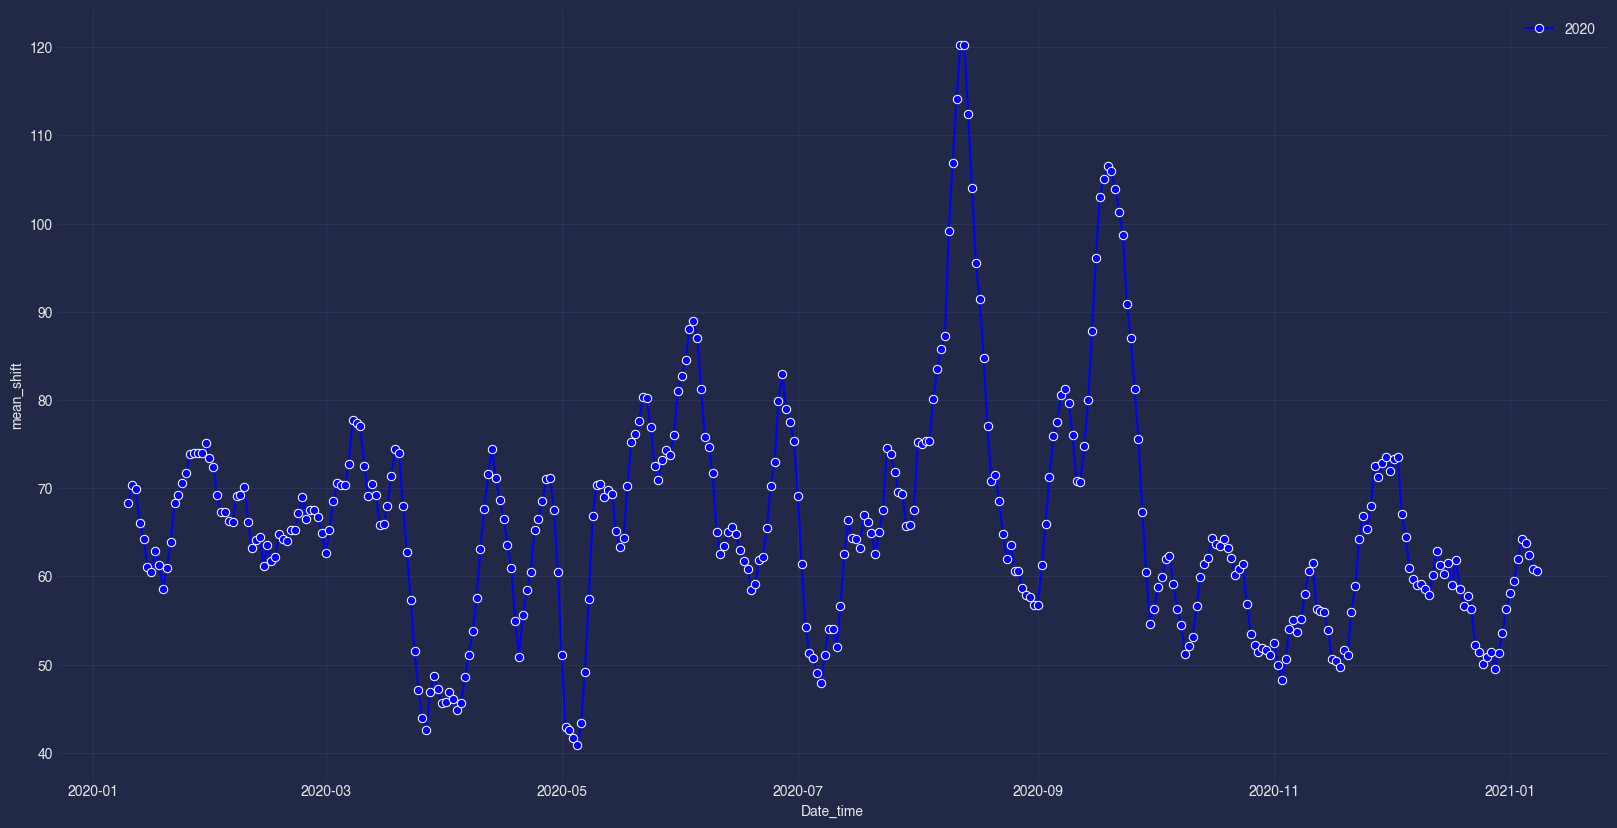

In [65]:
plt.figure(figsize=(20,10))

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

fig.suptitle('MEAN PM25 per day')

# 2018
sns.lineplot( x = "Date_time", y = "mean_shift", data=df_test[730:1095],

             marker = "o",label="2020",color = "blue")
plt.show()




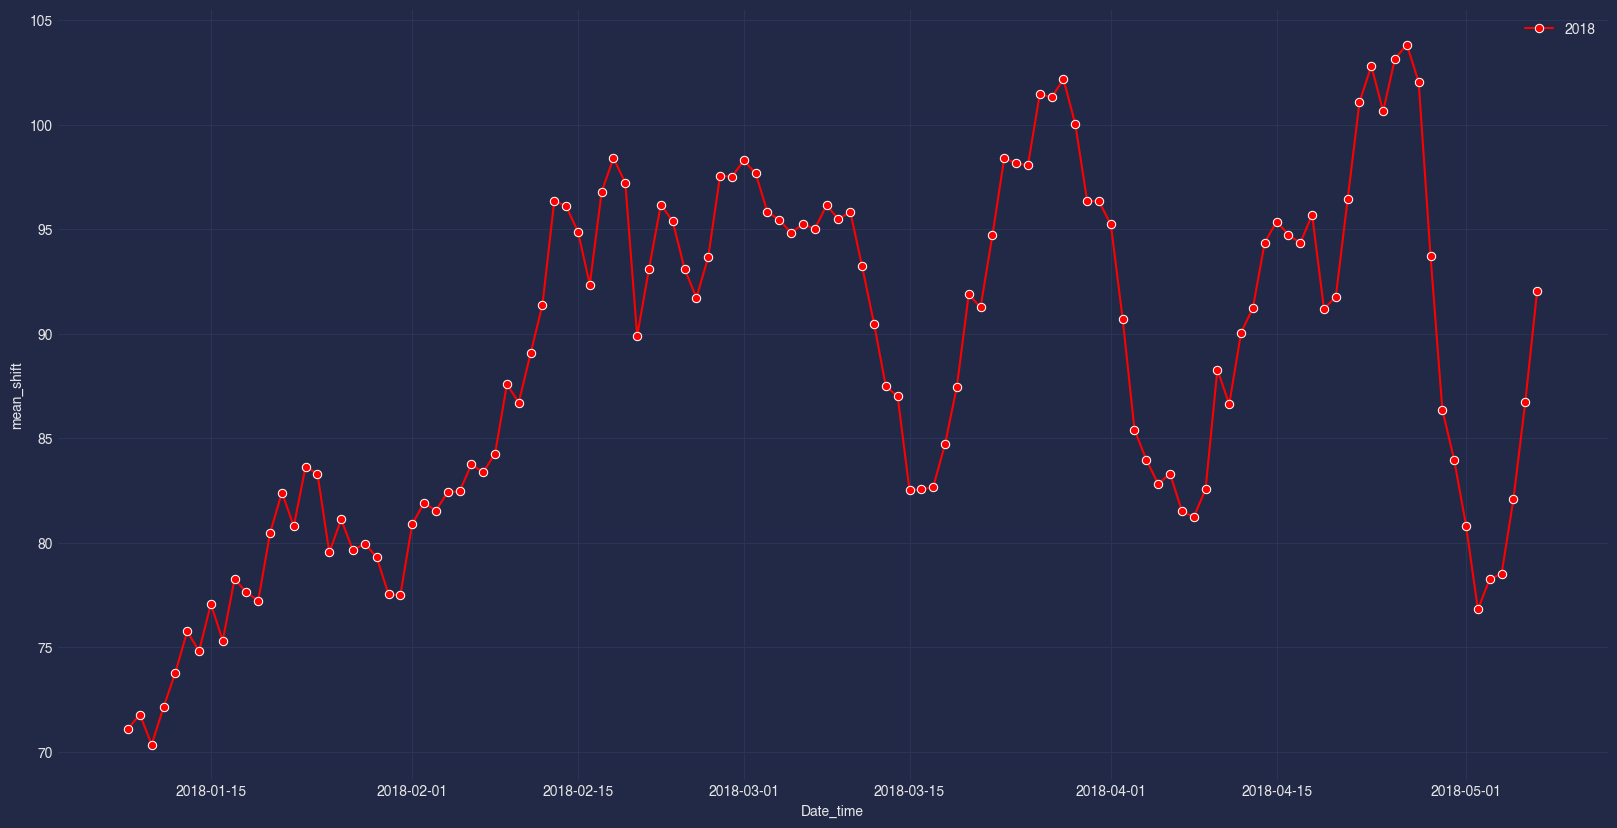

In [66]:
plt.figure(figsize=(20,10))

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

fig.suptitle('MEAN PM25 per day')


sns.lineplot( x = "Date_time", y = "mean_shift", data=df_test[0:120],marker = "o",label="2018",color = "red")

# 2018




plt.show()


In [67]:
df_ref.dtypes





NameError: name 'df_ref' is not defined

In [68]:
df_ref["Month-Day"]=df_ref.Date_time.map(lambda x: x.strftime('%m-%d'))
df_ref
df_ref_3 = df_ref.groupby(by="Month-Day",as_index=False).mean()





NameError: name 'df_ref' is not defined

In [69]:
df_ref['MonthDay'] = df_ref['Date_time'].map(lambda x: 10*x.month + x.day)


df_ref.head(25)








NameError: name 'df_ref' is not defined

In [70]:
import datetime as dt
df_ref = df_test.copy()
df_ref



# on veut créer 3 colonnes qui est la moyenne de l'année

#On veut créer une année fictive qui est en fait la moyenne des autres années
#On veut créer 
#Puis on plot cette année fictive : 


#et on regarde les pics de pollution 

df_ref["Date_time_2"]= df_ref["Date_time"].astype(str)

df_ref["day"]= df_ref["Date_time"].dt.day

df_ref["month"]= df_ref["Date_time"].dt.month



df_ref_2 = df_ref.groupby(by=["month","day"],as_index=False).mean()
df_ref















/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_61686/902504360.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ref_2 = df_ref.groupby(by=["month","day"],as_index=False).mean()


,PM25,Date_time,J-1,J-2,J-3,J-4,J-5,J-6,J-7,mean_shift,Date_time_2,day,month
7,75.84,2018-01-08,71.10,71.10,71.10,71.10,71.10,71.10,71.10,71.100000,2018-01-08,8,1
8,61.04,2018-01-09,75.84,71.10,71.10,71.10,71.10,71.10,71.10,71.777143,2018-01-09,9,1
9,83.58,2018-01-10,61.04,75.84,71.10,71.10,71.10,71.10,71.10,70.340000,2018-01-10,10,1
10,82.75,2018-01-11,83.58,61.04,75.84,71.10,71.10,71.10,71.10,72.122857,2018-01-11,11,1
11,84.88,2018-01-12,82.75,83.58,61.04,75.84,71.10,71.10,71.10,73.787143,2018-01-12,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,57.41,2022-11-09,40.96,43.02,36.53,53.37,53.00,46.97,45.75,45.657143,2022-11-09,9,11
1771,55.69,2022-11-10,57.41,40.96,43.02,36.53,53.37,53.00,46.97,47.322857,2022-11-10,10,11
1772,35.26,2022-11-11,55.69,57.41,40.96,43.02,36.53,53.37,53.00,48.568571,2022-11-11,11,11
1773,49.01,2022-11-12,35.26,55.69,57.41,40.96,43.02,36.53,53.37,46.034286,2022-11-12,12,11


In [71]:
plt.figure(figsize=(20,10))

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

fig.suptitle('MEAN PM25 per day')

# 2018
sns.lineplot( x = "Month-Day", y = "mean_shift", data=df_ref_3,
             marker = "o",label="Année fictive",color = "blue")
plt.show()









NameError: name 'df_ref_3' is not defined

In [ ]:
#Maintenant il faut qu'on définisse une règle pour indiquer l'encodage que notre modèle va suivre 
# Notre règle va être basé sur 80 

In [72]:
def encoder(x):
    if x > 80:
        return 1
    else:
        
        return 0

In [73]:
#Encoding 

df_test["Pollution_peak"] = df_test["mean_shift"]
df_test["Pollution_peak"] = df_test["mean_shift"].apply(encoder)
df_test[df_test["Pollution_peak"] == 1]








,PM25,Date_time,J-1,J-2,J-3,J-4,J-5,J-6,J-7,mean_shift,Pollution_peak
19,78.00,2018-01-20,107.54,80.00,79.09,81.71,63.50,86.96,64.46,80.465714,1
20,75.67,2018-01-21,78.00,107.54,80.00,79.09,81.71,63.50,86.96,82.400000,1
21,83.50,2018-01-22,75.67,78.00,107.54,80.00,79.09,81.71,63.50,80.787143,1
22,79.25,2018-01-23,83.50,75.67,78.00,107.54,80.00,79.09,81.71,83.644286,1
23,52.75,2018-01-24,79.25,83.50,75.67,78.00,107.54,80.00,79.09,83.292857,1
...,...,...,...,...,...,...,...,...,...,...,...
1661,65.53,2022-07-23,71.86,68.50,68.41,115.85,136.16,77.45,83.79,88.860000,1
1662,81.70,2022-07-24,65.53,71.86,68.50,68.41,115.85,136.16,77.45,86.251429,1
1663,51.83,2022-07-25,81.70,65.53,71.86,68.50,68.41,115.85,136.16,86.858571,1
1684,51.56,2022-08-15,61.42,89.10,110.43,97.75,82.06,60.17,61.97,80.414286,1


In [74]:
from workflow.data_viz import data_viz
from workflow.preprocessing import preprocess_without_scaling

%load_ext autoreload
%autoreload 2

import pandas as pd 

df_13 = pd.read_csv("../../data/pollution/2_Processed/PA75013.csv").copy()
df_13




df_13_preprocessed_w_scaling = preprocess_without_scaling(df_13)
df_13_preprocessed_w_scaling

data_viz_test = data_viz(df_13_preprocessed_w_scaling)
data_viz_test









The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
You have dropped PM25 with 100.0 % of NA
You have dropped PM10 with 100.0 % of NA
You have dropped SO2 with 100.0 % of NA
You have processed                    Date_time   NO2    O3     Station_name Station_type
0      2018/01/01 01:00:00+00   9.0  73.0  75013 - Eastman       Urbain
1      2018/01/01 02:00:00+00   9.0  73.0  75013 - Eastman       Urbain
2      2018/01/01 03:00:00+00  11.0  70.0  75013 - Eastman       Urbain
3      2018/01/01 04:00:00+00  11.0  67.0  75013 - Eastman       Urbain
4      2018/01/01 05:00:00+00  10.0  66.0  75013 - Eastman       Urbain
...                       ...   ...   ...              ...          ...
42642  2022/11/12 19:00:00+00  46.2   1.8  75013 - Eastman       Urbain
42643  2022/11/12 20:00:00+00  47.4   1.7  75013 - Eastman       Urbain
42644  2022/11/12 21:00:00+00  42.9   1.7  75013 - Eastman       Urbain
42645  2022/11/12 22:00:00+00  40.1   1.5  75013 - E

/Users/Edouard_1/code/TheLab75/ParisDeepAirProject/workflow/data_viz.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = df["Date_time"].dt.week


,Date_time,NO2,O3,ATMO,year,week,day,month,weekday_name
0,2018-01-01,24.0,73.0,0.0,2018,1,1,1,0
1,2018-01-02,55.0,65.0,0.0,2018,1,2,1,1
2,2018-01-03,33.0,75.0,0.0,2018,1,3,1,2
3,2018-01-04,47.0,62.0,0.0,2018,1,4,1,3
4,2018-01-05,78.0,77.0,0.0,2018,1,5,1,4
...,...,...,...,...,...,...,...,...,...
1772,2022-11-08,43.0,54.1,0.0,2022,45,8,11,1
1773,2022-11-09,68.3,54.9,0.0,2022,45,9,11,2
1774,2022-11-10,49.5,42.9,0.0,2022,45,10,11,3
1775,2022-11-11,33.2,43.3,0.0,2022,45,11,11,4


/Users/Edouard_1/code/TheLab75/ParisDeepAirProject/workflow/data_viz.py:130: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby = df.groupby(by=["year",period],as_index=False).mean()


     year  week        NO2         O3  ATMO        day      month  \
0    2018     1  47.262500  58.700000   0.0   7.375000   2.375000   
1    2018     2  57.714286  31.857143   0.0  11.000000   1.000000   
2    2018     3  54.000000  67.857143   0.0  18.000000   1.000000   
3    2018     4  66.571429  52.714286   0.0  25.000000   1.000000   
4    2018     5  55.714286  52.571429   0.0  14.285714   1.571429   
..    ...   ...        ...        ...   ...        ...        ...   
251  2022    42  43.942857  55.585714   0.0  20.000000  10.000000   
252  2022    43  51.271429  51.285714   0.0  27.000000  10.000000   
253  2022    44  35.528571  54.057143   0.0   7.428571  10.857143   
254  2022    45  46.516667  45.300000   0.0   9.500000  11.000000   
255  2022    52  39.300000  46.100000   0.0   1.500000   1.000000   

     weekday_name  
0           2.625  
1           3.000  
2           3.000  
3           3.000  
4           3.000  
..            ...  
251         3.000  
252        

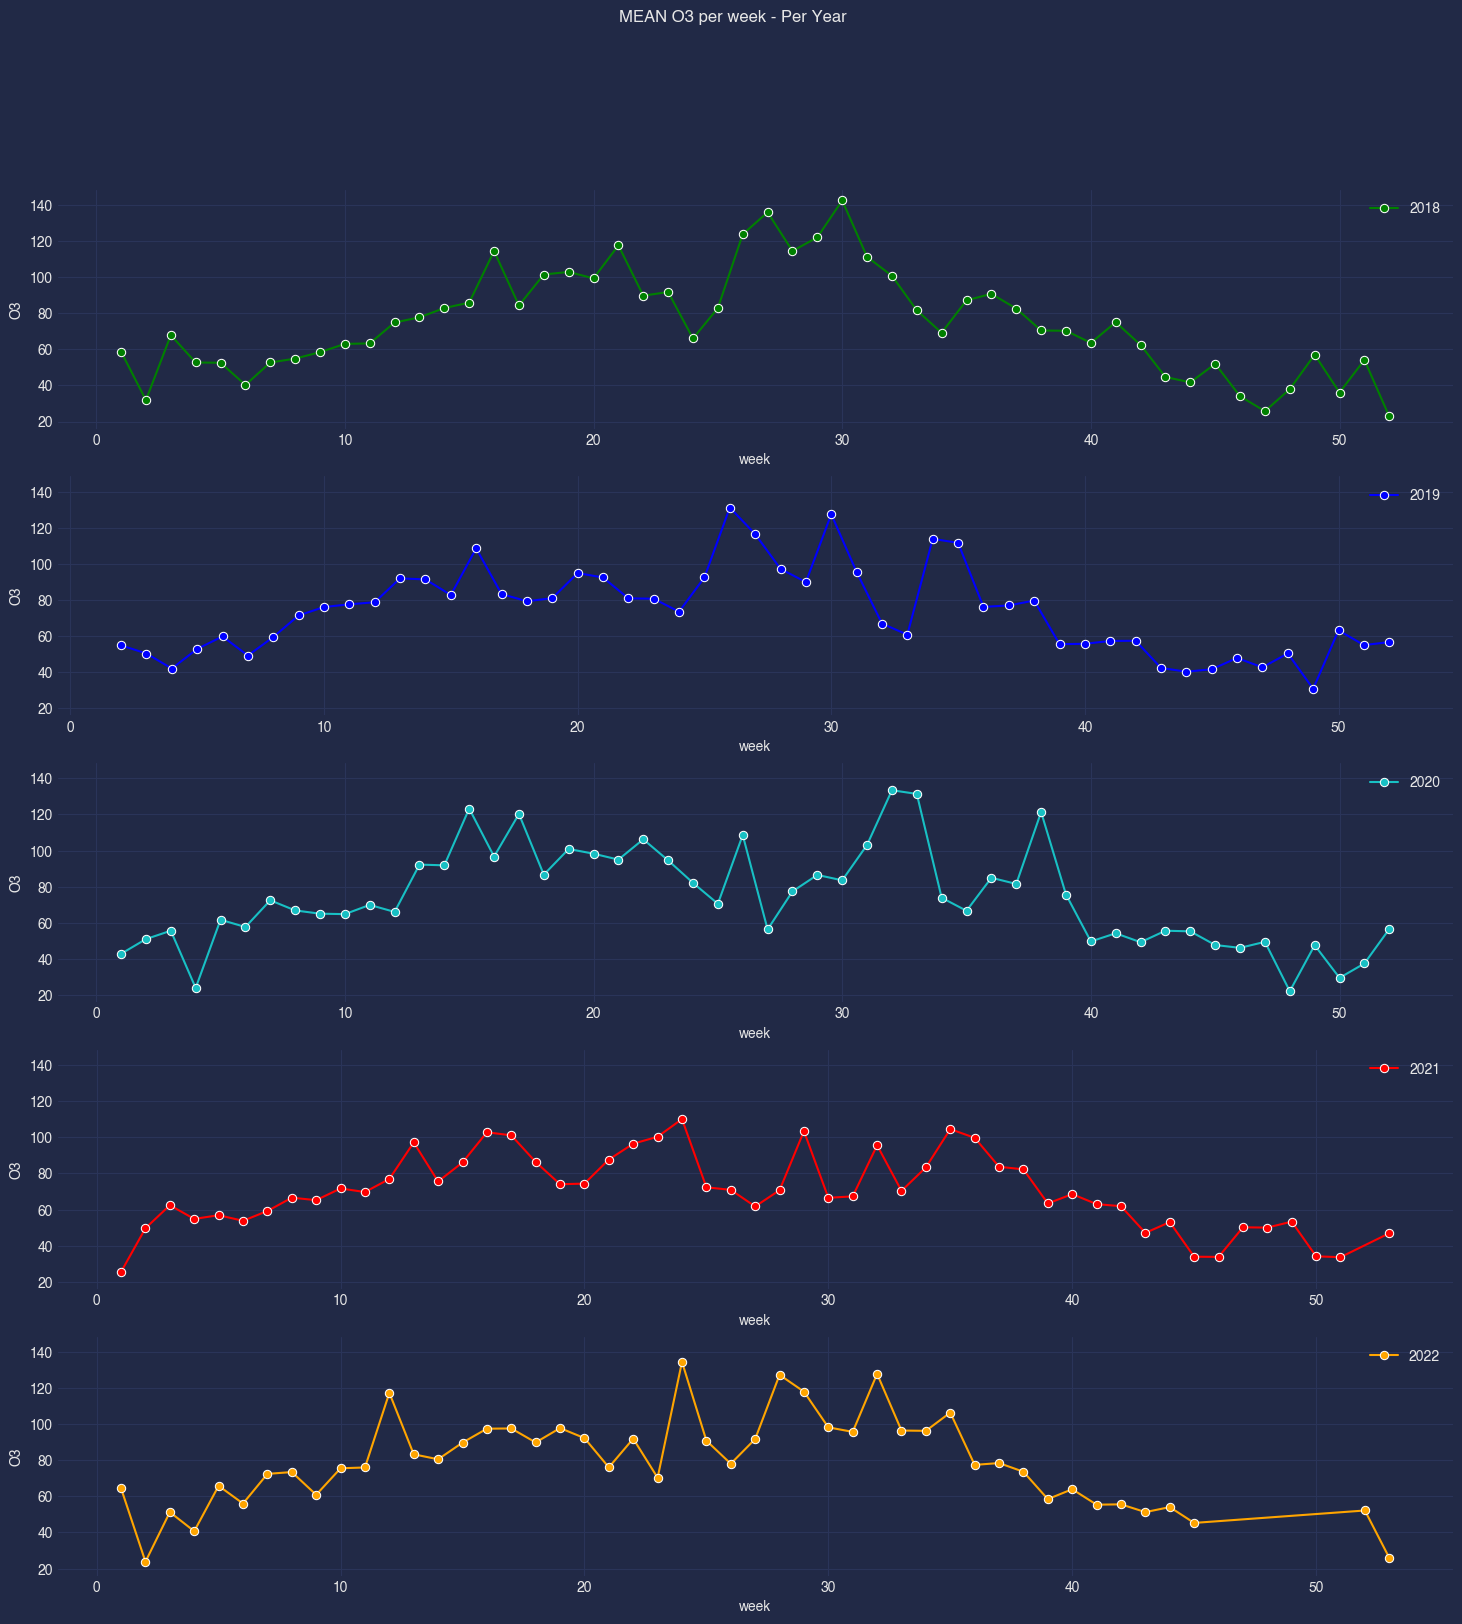

In [90]:
from workflow.data_viz import plot_pollutant_v1
from workflow.data_viz import plot_pollutant_v2


plot_pollutant_v2(data_viz_test,"O3","week")













